<a href="https://colab.research.google.com/github/rinman57/DSS_song_popularity/blob/main/DSS_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group Members: Elianna, Rinrada, Alfredo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

#reading the data
spotify_data = pd.read_csv("spotify-2023.csv", encoding='latin-1')

In [ ]:
#viewing the top 5 rows of our dataset
spotify_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
#now all of you should do some data cleaning!
#think about what question you want to answer, and clean the data according to that!
#look at if there are missing rows, invalid data types, unnecessary columns, duplicate rows, etc
#refer to the slides from last week for tips & methods
#let me know if you need help/have questions :)

In [ ]:
spotify_data.shape

(953, 24)

In [ ]:
spotify_data = spotify_data.drop_duplicates()

In [ ]:
spotify_data.shape
#no duplicates

(953, 24)

In [ ]:
#in_shazam_charts and key have NA values
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
spotify_data.drop(columns=['key'], axis=1)
spotify_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [ ]:
spotify_data[spotify_data['in_shazam_charts'].isna()]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,403,...,174,F#,Minor,52,66,73,34,0,31,6
54,Another Love,Tom Odell,1,2012,10,15,18371,83,1813673666,250,...,123,E,Minor,45,13,54,70,0,9,4
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,171,C#,Major,50,38,80,0,0,9,7
71,Heat Waves,Glass Animals,1,2020,6,28,22543,63,2557975762,386,...,81,B,Major,76,53,53,44,0,9,9
73,Sweater Weather,The Neighbourhood,1,2012,5,14,16413,61,2282771485,166,...,124,A#,Major,61,41,81,5,2,10,3
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,110,C#,Major,50,45,41,75,0,11,3
127,Watermelon Sugar,Harry Styles,1,2019,11,17,21915,34,2322580122,437,...,95,NaN,Major,55,56,82,12,0,34,5
158,Ghost,Justin Bieber,1,2021,3,19,5866,24,1167330737,107,...,154,D,Major,61,41,74,21,0,40,6
159,Under The Influence,Chris Brown,1,2019,10,4,3859,26,929964809,133,...,117,A,Minor,73,31,69,6,0,11,4
180,Night Changes,One Direction,1,2014,11,17,7124,18,1131090940,60,...,120,G#,Major,67,40,52,86,0,12,4


In [ ]:
spotify_data.fillna(0)['in_shazam_charts']
spotify_data.fillna(0)['in_shazam_charts'].iloc[534]

0

In [ ]:
#making the values in track_name column all lower case
spotify_data['track_name'] = spotify_data['track_name'].str.lower()

#remove anything that has (feat...) in it since the artist(s) name column already tells us who are the artists
spotify_data['track_name'] = spotify_data['track_name'].str.replace(r'\s\([^)]*\)', '', regex=True)

In [ ]:
#storing artist names as lists instead so they are more accessible
spotify_data["artist(s)_name"] = spotify_data["artist(s)_name"].str.replace(r"\s*,\s*", ", ", regex=True).str.split(", ")

In [ ]:
spotify_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,seven,"[Latto, Jung Kook]",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,lala,[Myke Towers],1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,[Olivia Rodrigo],1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,cruel summer,[Taylor Swift],1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,where she goes,[Bad Bunny],1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,my mind & me,[Selena Gomez],1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,bigger than the whole sky,[Taylor Swift],1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,a veces,"[Feid, Paulo Londra]",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,en la de ella,"[Feid, Sech, Jhayco]",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [ ]:
#now our data is cleaned!
#lets explore some patterns more with EDA
#add cells below to create visualizations/practice EDA

In [ ]:
type(spotify_data.loc[2, "streams"])

str

In [ ]:
spotify_data['streams'].dtype

dtype('O')

In [ ]:
spotify_data[~spotify_data['streams'].str.isnumeric()]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,love grows,[Edison Lighthouse],1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,110,A,Major,53,75,69,7,0,17,3


In [ ]:
spotify_data.drop(spotify_data[~spotify_data['streams'].str.isnumeric()].index, inplace=True)

In [ ]:
spotify_data['streams'] = spotify_data['streams'].astype('int64')

In [ ]:
spotify_data[573:575]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
573,don't be shy,"[Tiï¿½ï¿½sto, Kar]",2,2021,8,1,6026,0,566954746,171,...,120,B,Minor,77,51,79,20,0,26,6
575,la fama,"[The Weeknd, ROSALï¿½]",2,2021,11,11,4640,3,374706940,81,...,136,NaN,Minor,77,82,30,95,0,13,5


In [ ]:
#Rinrada / Earn's questions:
# 1. Are there any correlations between what month the music was released (also the number of artists) vs. the number of streams?
# 2. What's the distributions of keys like? Which keys are most commonly used?
# 3. (follow up to #2) how does the key relate to danceability and energy?

In [ ]:
type(spotify_data.loc[0, "streams"]) #streams column is actually a string so Earn will convert it to an int

numpy.int64

In [ ]:
spotify_data["streams"].head()

,streams
0,141381703
1,133716286
2,140003974
3,800840817
4,303236322


In [ ]:
spotify_data["streams"] = pd.to_numeric(spotify_data["streams"]) #not sure what else to do to fix this

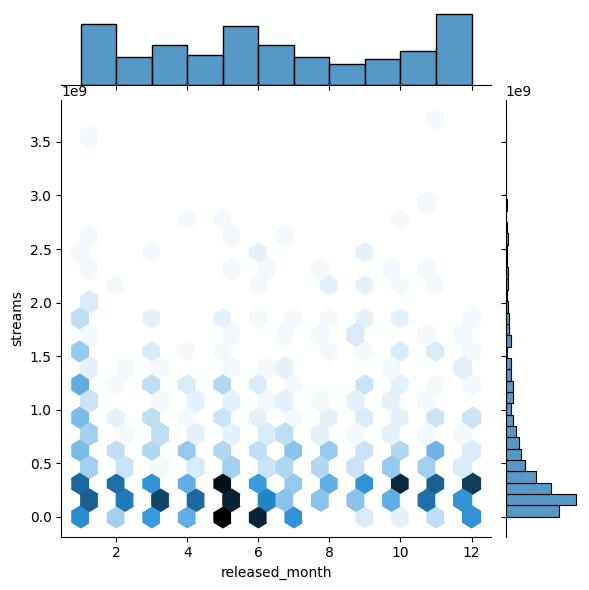

In [ ]:
sns.jointplot(data = spotify_data, x = 'released_month', y = 'streams', kind = 'hex')

<ipython-input-29-edb37b30c9c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= spotify_data, x="key", palette = "Set2");


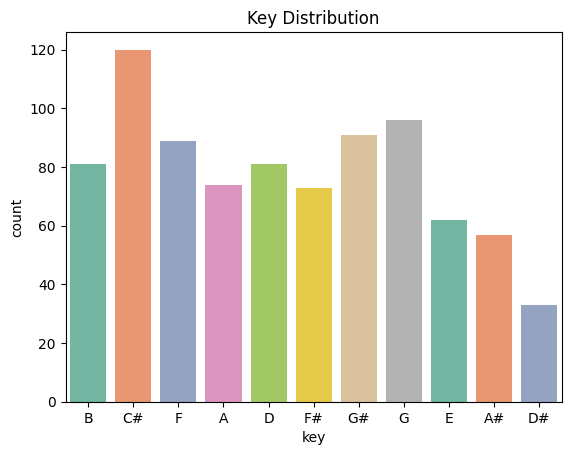

In [ ]:
#showing the distributions of keys useda and their count
sns.countplot(data= spotify_data, x="key", palette = "Set2");
plt.title("Key Distribution");

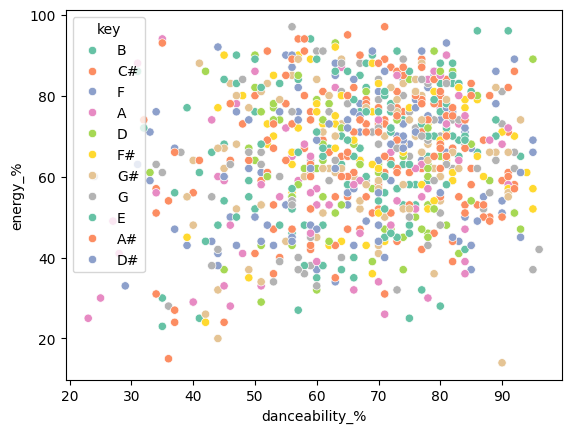

In [ ]:
#to see if there are any relationships between the danceability % and energy %, and whether or not the key affect those percentages
#looks lie there is no relationship since they're all over the place... or do we need to stretch it out more?
sns.scatterplot(data=spotify_data, x="danceability_%", y="energy_%", hue="key", palette = "Set2");

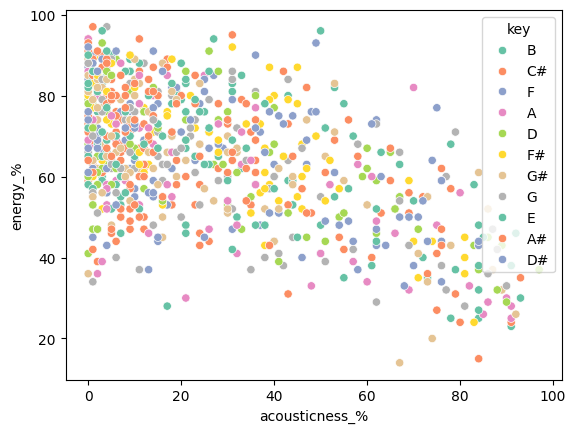

In [ ]:
#however, there is a negative correlation between acousticness_% and energy_%, which makes sense!
sns.scatterplot(data=spotify_data, x="acousticness_%", y="energy_%", hue="key", palette = "Set2");

Alfredo's Questions:

*   Does the average number of streams change according to the number of artists on a track? (x: artist_count, y: average number of streams, boxplot).

*   How does BPM correlate to the positivity of the song's content (valence_%)? (x: valence_%, y: BPM)


In [ ]:
#Group the "artist_count" column in order to get the amount of times each artist_count appeared
artist_count_grouped = spotify_data.groupby("artist_count").size().reset_index(name="artist_count_grouped")
artist_count_grouped

,artist_count,artist_count_grouped
0,1,586
1,2,254
2,3,85
3,4,15
4,5,5
5,6,3
6,7,2
7,8,2


Text(0, 0.5, 'Count')

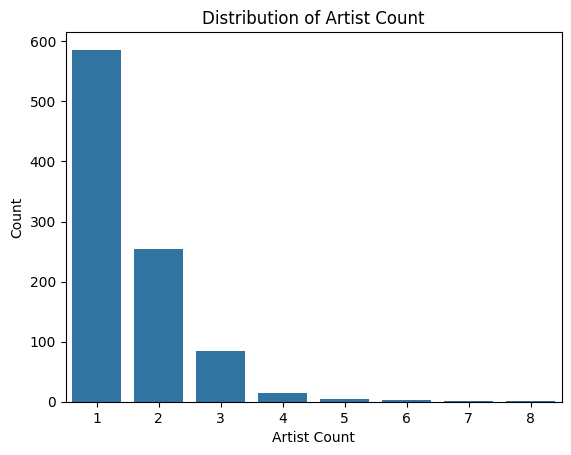

In [ ]:
#display distribution of artist_count
sns.countplot(data=spotify_data, x="artist_count");
plt.title("Distribution of Artist Count")
plt.xlabel("Artist Count")
plt.ylabel("Count")

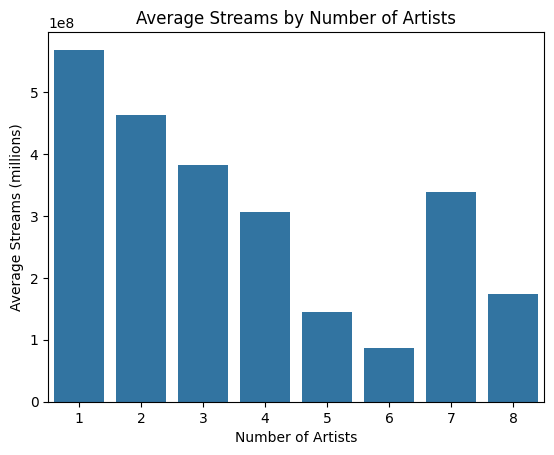

In [ ]:
# Calculate the average streams per artist count
average_streams_by_artist_count = spotify_data.groupby('artist_count')['streams'].mean().reset_index()

# Create the plot
sns.barplot(x='artist_count', y='streams', data=average_streams_by_artist_count)
plt.title('Average Streams by Number of Artists')
plt.xlabel('Number of Artists')
plt.ylabel('Average Streams (millions)')
plt.show()

Correlation between BPM and Valence: 0.041692778293350594


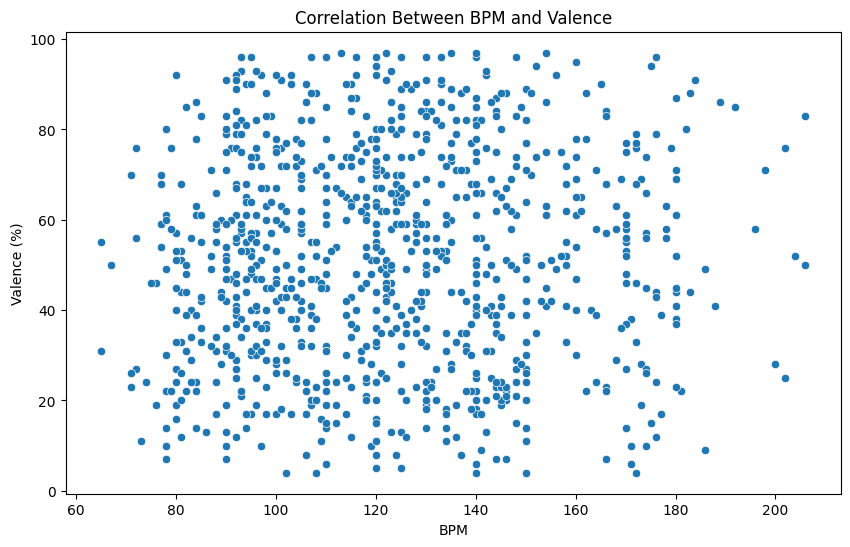

In [ ]:
# Calculate the correlation between BPM and valence
correlation = spotify_data['bpm'].corr(spotify_data['valence_%'])
print(f"Correlation between BPM and Valence: {correlation}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bpm', y='valence_%', data=spotify_data)
plt.title('Correlation Between BPM and Valence')
plt.xlabel('BPM')
plt.ylabel('Valence (%)')
plt.show()

#This is a weak correlation implying that Beats per Minute doesnt have a strong association to the positivity of the songs content.

Text(0, 0.5, 'Danceability (%)')

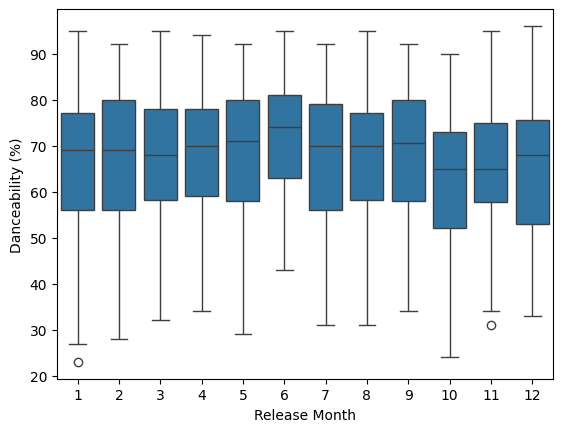

In [ ]:
#correlation between danceability and release month?
sns.boxplot(x=spotify_data["released_month"], y=spotify_data["danceability_%"])
plt.xlabel("Release Month")
plt.ylabel("Danceability (%)")
#no correlation

Text(0, 0.5, 'BPM')

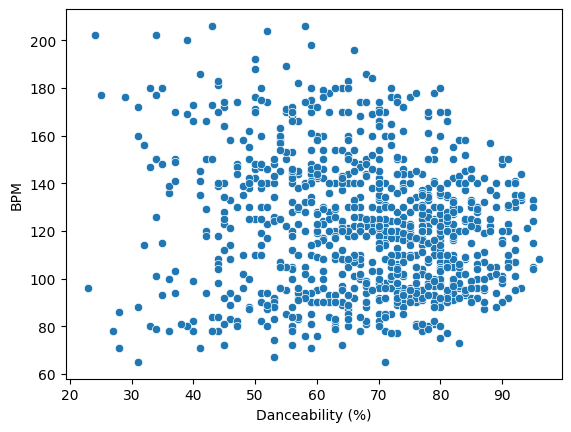

In [ ]:
#BPM relationship with danceablitiy
sns.scatterplot(x=spotify_data["danceability_%"], y=spotify_data["bpm"])
plt.xlabel("Danceability (%)")
plt.ylabel("BPM")

Text(0, 0.5, 'BPM')

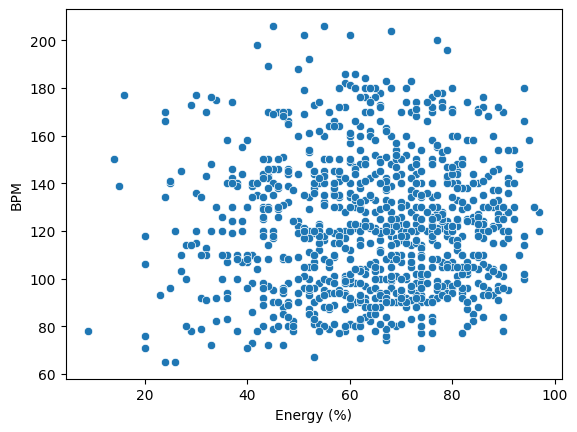

In [ ]:
#BPM relationship with energy
sns.scatterplot(x=spotify_data["energy_%"], y=spotify_data["bpm"])
plt.xlabel("Energy (%)")
plt.ylabel("BPM")

In [ ]:
spotify_data['track_name_length'] = spotify_data['track_name'].astype(str).apply(len)
spotify_data[['track_name','track_name_length', 'streams']]

,track_name,track_name_length,streams
0,seven,5,141381703
1,lala,4,133716286
2,vampire,7,140003974
3,cruel summer,12,800840817
4,where she goes,14,303236322
...,...,...,...
948,my mind & me,12,91473363
949,bigger than the whole sky,25,121871870
950,a veces,7,73513683
951,en la de ella,13,133895612


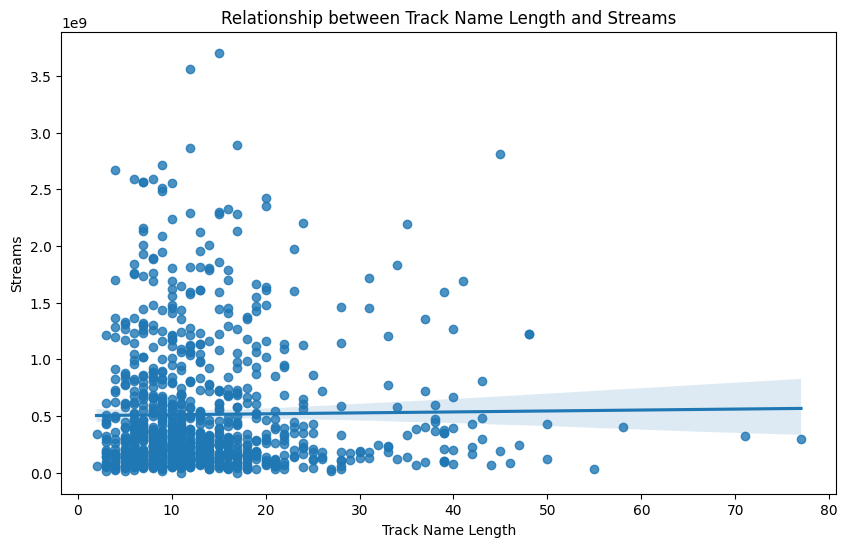

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='track_name_length', y='streams', data=spotify_data)
plt.title('Relationship between Track Name Length and Streams')
plt.xlabel('Track Name Length')
plt.ylabel('Streams')
plt.show()

In [ ]:
spotify_data[spotify_data['released_year'] == 2022]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_name_length
14,as it was,[Harry Styles],1,2022,3,31,23575,130,2513188493,403,...,F#,Minor,52,66,73,34,0,31,6,9
15,kill bill,[SZA],1,2022,12,8,8109,77,1163093654,183,...,G#,Major,64,43,73,5,17,16,4,9
26,calm down,"[Rï¿½ï¿½ma, Selena G]",2,2022,3,25,7112,77,899183384,202,...,B,Major,80,82,80,43,0,14,4,9
32,creepin',"[The Weeknd, 21 Savage, Metro Boomin]",3,2022,12,2,6036,88,843957510,113,...,C#,Minor,71,17,61,36,0,8,5,8
33,anti-hero,[Taylor Swift],1,2022,10,21,9082,56,999748277,242,...,E,Major,64,51,63,12,0,19,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,my mind & me,[Selena Gomez],1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,12
949,bigger than the whole sky,[Taylor Swift],1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,25
950,a veces,"[Feid, Paulo Londra]",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,7
951,en la de ella,"[Feid, Sech, Jhayco]",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,13


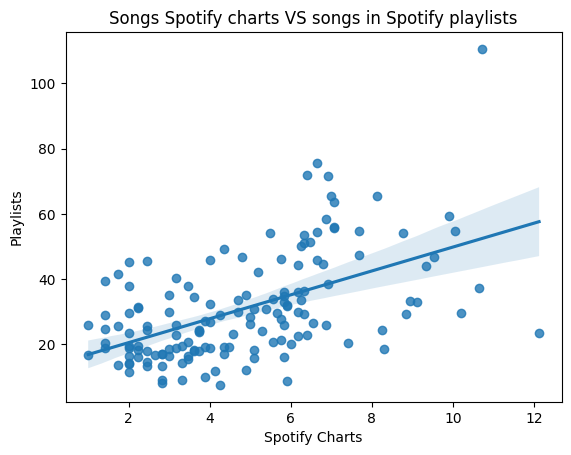

,in_spotify_playlists,in_spotify_charts
in_spotify_playlists,1.000000,0.492872
in_spotify_charts,0.492872,1.000000


In [ ]:
plt.figure()
spotify_2023 = spotify_data[spotify_data['released_year'] == 2023]
spotify_2023 = spotify_2023[spotify_2023['in_spotify_charts'] != 0]
sns.regplot(x=np.sqrt(spotify_2023['in_spotify_charts']), y=np.sqrt(spotify_2023['in_spotify_playlists']))
plt.title('Songs Spotify charts VS songs in Spotify playlists')
plt.xlabel('Spotify Charts')
plt.ylabel('Playlists')
plt.show()
spotify_corr = ['in_spotify_playlists', 'in_spotify_charts']
spotify_corr = spotify_2023[spotify_corr]
spotify_corr.corr()

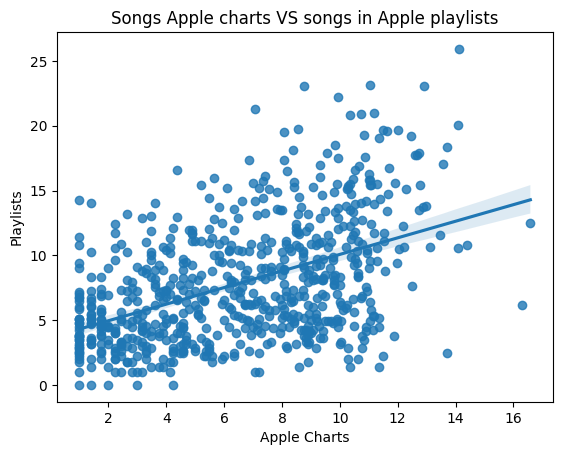

,in_apple_playlists,in_apple_charts
in_apple_playlists,1.000000,0.465408
in_apple_charts,0.465408,1.000000


In [ ]:
spotify_data_drop_zero = spotify_data[spotify_data['in_apple_charts'] != 0]
spotify_data_drop_zero = spotify_data_drop_zero[spotify_data_drop_zero['released_year'] != 2023]
plt.figure()
sns.regplot(x=np.sqrt(spotify_data_drop_zero['in_apple_charts']), y=np.sqrt(spotify_data_drop_zero['in_apple_playlists']))
plt.title('Songs Apple charts VS songs in Apple playlists')
plt.xlabel('Apple Charts')
plt.ylabel('Playlists')
plt.show()
apple_corr = ['in_apple_playlists', 'in_apple_charts']
apple_corr = spotify_data_drop_zero[apple_corr]
apple_corr.corr()

In [ ]:
spotify_data_months = spotify_data.groupby('released_month').agg({'streams': 'max'})
spotify_data_months

,streams
released_month,
1,3562543890
2,2204080728
3,2513188493
4,2713922350
5,2864791672
6,2557975762
7,2665343922
8,2355719893
9,2565529693


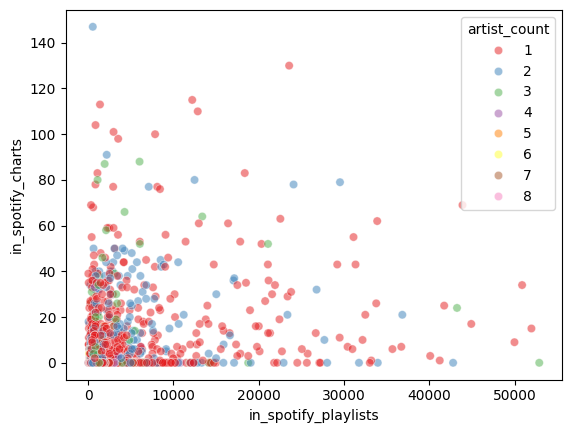

In [ ]:
sns.scatterplot(data=spotify_data, x="in_spotify_playlists", y="in_spotify_charts", hue = "artist_count", palette="Set1", alpha = 0.5);

#is in_spotify_charts the number of times it has appeared on the charts or the number in ranks it is in?

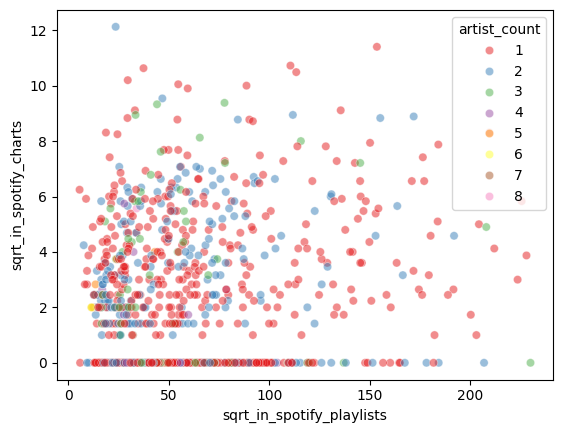

In [ ]:
spotify_data["sqrt_in_spotify_playlists"] = np.sqrt(spotify_data["in_spotify_playlists"])
spotify_data["sqrt_in_spotify_charts"] = np.sqrt(spotify_data["in_spotify_charts"])

sns.scatterplot(data=spotify_data, x="sqrt_in_spotify_playlists", y="sqrt_in_spotify_charts", hue = "artist_count", palette="Set1", alpha = 0.5);

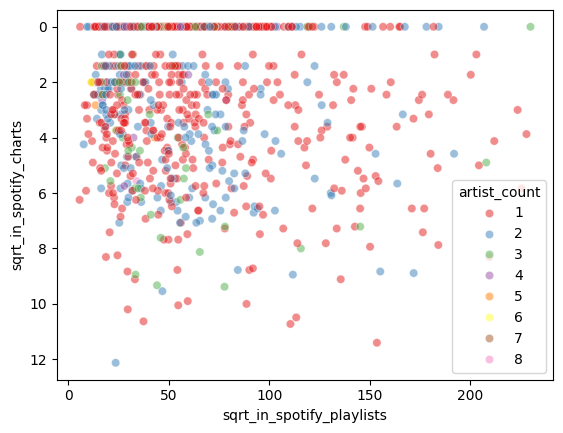

In [ ]:
spotify_data["sqrt_in_spotify_playlists"] = np.sqrt(spotify_data["in_spotify_playlists"])
spotify_data["sqrt_in_spotify_charts"] = np.sqrt(spotify_data["in_spotify_charts"])

sns.scatterplot(data=spotify_data, x="sqrt_in_spotify_playlists", y="sqrt_in_spotify_charts", hue = "artist_count", palette="Set1", alpha = 0.5);

plt.gca().invert_yaxis()  # This flips the y-axis
plt.show()

#Should I remove anything that is 0 within spotify_data? Maybe then we can see the correlations more clearer?

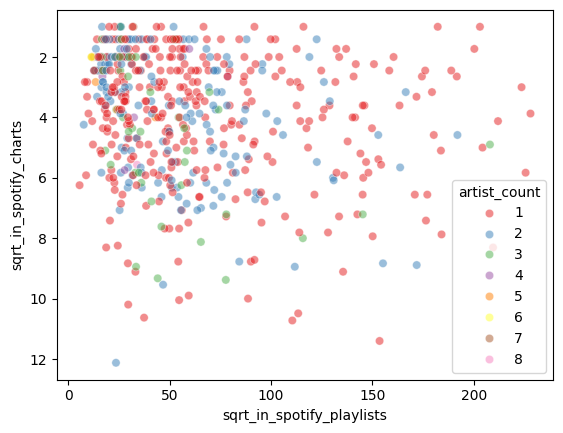

In [ ]:
#flipped the y-axis since it contains the ranking, and now we can see if there are any correlations
spotify_data_wo0 = spotify_data[(spotify_data["in_spotify_playlists"] != 0) & (spotify_data["in_spotify_charts"] != 0)]

sns.scatterplot(data= spotify_data_wo0, x="sqrt_in_spotify_playlists", y="sqrt_in_spotify_charts", hue = "artist_count", palette="Set1", alpha = 0.5);

plt.gca().invert_yaxis()  # This flips the y-axis
plt.show()

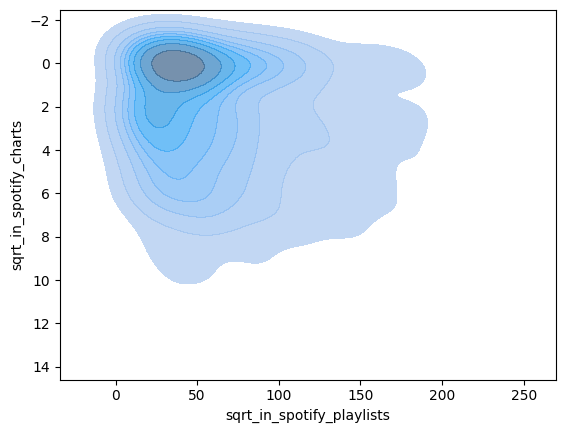

In [ ]:
sns.kdeplot(
    data= spotify_data,
    x="sqrt_in_spotify_playlists",
    y="sqrt_in_spotify_charts",
    fill=True,
    alpha=0.7
);

plt.gca().invert_yaxis()
#plt.title('Bivariate KDE Plot Comparison of Registered vs Casual Riders');

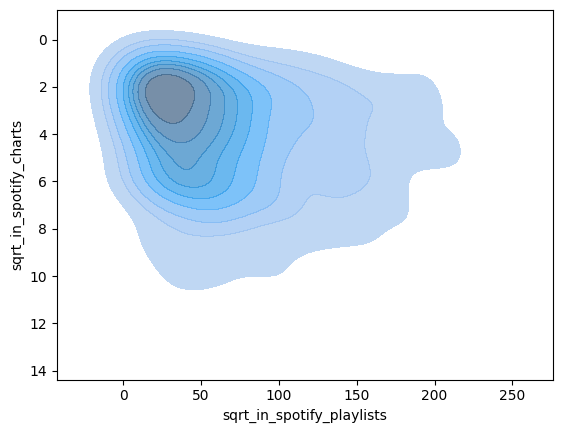

In [ ]:
sns.kdeplot(
    data= spotify_data_wo0,
    x="sqrt_in_spotify_playlists",
    y="sqrt_in_spotify_charts",
    fill=True,
    alpha=0.7
);

plt.gca().invert_yaxis()

In [ ]:
spotify_data_top_streams_per_month = spotify_data.loc[spotify_data.groupby('released_month')['streams'].idxmax()].reset_index()
spotify_data_top_streams_per_month
#helps shows us which songs and artists had the highest number of streams in 2023. We can also see when the songs were released and whether or not
#that affects the chances of new artists being able to top the chart

,index,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_name_length,sqrt_in_spotify_playlists,sqrt_in_spotify_charts
0,179,shape of you,[Ed Sheeran],1,2017,1,6,32181,10,3562543890,...,83,93,65,58,0,9,8,12,179.390635,3.162278
1,724,something just like this,"[The Chainsmokers, Coldplay]",2,2017,2,22,23375,21,2204080728,...,61,47,65,3,0,17,4,24,152.888849,4.582576
2,14,as it was,[Harry Styles],1,2022,3,31,23575,130,2513188493,...,52,66,73,34,0,31,6,9,153.541525,11.401754
3,162,one dance,"[Drake, WizKid, Kyla]",3,2016,4,4,43257,24,2713922350,...,77,36,63,1,0,36,5,9,207.983172,4.898979
4,620,dance monkey,[Tones and I],1,2019,5,10,24529,0,2864791672,...,82,54,59,69,0,18,10,12,156.617368,0.000000
5,71,heat waves,[Glass Animals],1,2020,6,28,22543,63,2557975762,...,76,53,53,44,0,9,9,10,150.143265,7.937254
6,84,stay,"[Justin Bieber, The Kid Laroi]",2,2021,7,9,17050,36,2665343922,...,59,48,76,4,0,10,5,4,130.575649,6.000000
7,128,lovely - bonus track,"[Billie Eilish, Khalid]",2,2017,8,11,15032,30,2355719893,...,35,12,30,93,0,10,3,20,122.605057,5.477226
8,48,starboy,"[The Weeknd, Daft Punk]",2,2016,9,21,29536,79,2565529693,...,68,49,59,16,0,13,28,7,171.860408,8.888194
9,41,sunflower - spider-man: into the spider-verse,"[Post Malone, Swae Lee]",2,2018,10,9,24094,78,2808096550,...,76,91,50,54,0,7,5,45,155.222421,8.831761


In [ ]:
spotify_data.info()
#11  in_deezer_playlists   952 non-null    object --> Dype "object"

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   track_name                 952 non-null    object 
 1   artist(s)_name             952 non-null    object 
 2   artist_count               952 non-null    int64  
 3   released_year              952 non-null    int64  
 4   released_month             952 non-null    int64  
 5   released_day               952 non-null    int64  
 6   in_spotify_playlists       952 non-null    int64  
 7   in_spotify_charts          952 non-null    int64  
 8   streams                    952 non-null    int64  
 9   in_apple_playlists         952 non-null    int64  
 10  in_apple_charts            952 non-null    int64  
 11  in_deezer_playlists        952 non-null    object 
 12  in_deezer_charts           952 non-null    int64  
 13  in_shazam_charts           902 non-null    object 
 14 

In [ ]:
type(spotify_data["in_deezer_playlists"].iloc[0])

str

In [ ]:
spotify_data[~spotify_data["in_deezer_playlists"].str.isnumeric()]["in_deezer_playlists"]
#The commas made it an object type

,in_deezer_playlists
48,"2,445"
54,"3,394"
55,"3,421"
65,"4,053"
73,"1,056"
...,...
761,"2,453"
762,"2,430"
871,"6,720"
893,"1,315"


In [ ]:
spotify_data[~spotify_data["in_deezer_playlists"].str.isnumeric()]["in_deezer_playlists"].str.replace(",", "").astype(int)
#removing the commas so that they become actual integers we can work with

,in_deezer_playlists
48,2445
54,3394
55,3421
65,4053
73,1056
...,...
761,2453
762,2430
871,6720
893,1315


In [ ]:
#replacing the old column with commas with new numbers without commas

spotify_data["in_deezer_playlists"] = spotify_data["in_deezer_playlists"].str.replace(",", "").astype(int)

In [ ]:
spotify_data["total_num_playlists"] = spotify_data["in_spotify_playlists"] + spotify_data["in_apple_playlists"] + spotify_data["in_deezer_playlists"]
spotify_data

#replaced the numbers with removed commas and added the new column into the DataFrame

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_name_length,sqrt_in_spotify_playlists,sqrt_in_spotify_charts,total_num_playlists
0,seven,"[Latto, Jung Kook]",2,2023,7,14,553,147,141381703,43,...,89,83,31,0,8,4,5,23.515952,12.124356,641
1,lala,[Myke Towers],1,2023,3,23,1474,48,133716286,48,...,61,74,7,0,10,4,4,38.392708,6.928203,1580
2,vampire,[Olivia Rodrigo],1,2023,6,30,1397,113,140003974,94,...,32,53,17,0,31,6,7,37.376463,10.630146,1582
3,cruel summer,[Taylor Swift],1,2019,8,23,7858,100,800840817,116,...,58,72,11,0,11,15,12,88.645361,10.000000,8099
4,where she goes,[Bad Bunny],1,2023,5,18,3133,50,303236322,84,...,23,80,14,63,11,6,14,55.973208,7.071068,3304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,my mind & me,[Selena Gomez],1,2022,11,3,953,0,91473363,61,...,24,39,57,0,8,3,12,30.870698,0.000000,1051
949,bigger than the whole sky,[Taylor Swift],1,2022,10,21,1180,0,121871870,4,...,7,24,83,1,12,6,25,34.351128,0.000000,1192
950,a veces,"[Feid, Paulo Londra]",2,2022,11,3,573,0,73513683,2,...,81,67,4,0,8,6,7,23.937418,0.000000,582
951,en la de ella,"[Feid, Sech, Jhayco]",3,2022,10,20,1320,0,133895612,29,...,67,77,8,0,12,5,13,36.331804,0.000000,1366


Alfredo Question's:
Does older music have lower streams than lower music?

*   Does older music have lower streams than lower music?
*     Do per year and per month
*     Do they appear in charts/playlists less?
*   Feature engineering: number of times an artist shows up in the dataset

In [ ]:
# Convert the 'released_year' and 'released_month' columns to datetime objects
spotify_data['released_year'] = pd.to_numeric(spotify_data['released_year'], errors='coerce')
spotify_data['released_month'] = pd.to_numeric(spotify_data['released_month'], errors='coerce')
spotify_data['released_date'] = pd.to_datetime(spotify_data['released_year'].astype(str) + '-' + spotify_data['released_month'].astype(str), format='%Y-%m', errors='coerce')

# Convert 'streams' column to numeric before grouping
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')
# Group by year and calculate the average streams
yearly_streams = spotify_data.groupby('released_year')['streams'].mean()

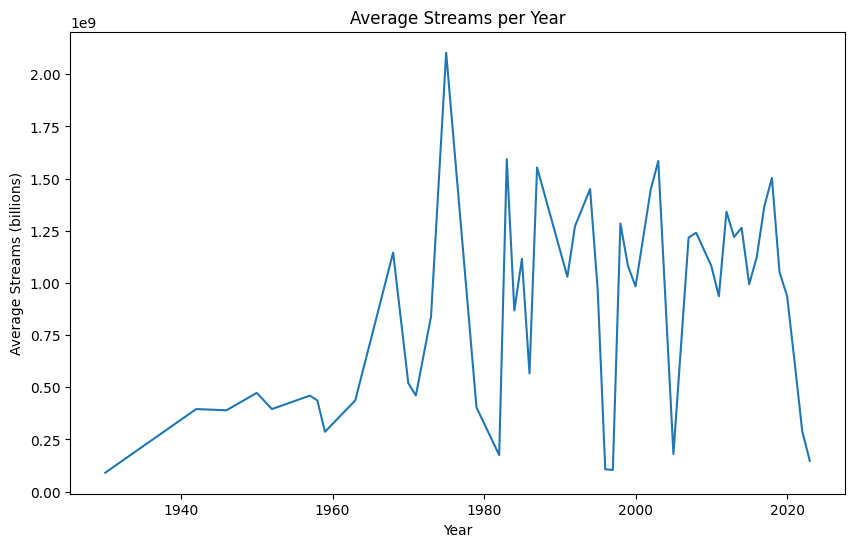

In [ ]:
# Plot the average streams per year
plt.figure(figsize=(10, 6))
plt.plot(yearly_streams.index, yearly_streams.values)
plt.xlabel('Year')
plt.ylabel('Average Streams (billions)')
plt.title('Average Streams per Year')
plt.show()

In [ ]:
# Group by month and calculate the average streams
monthly_streams = spotify_data.groupby('released_month')['streams'].mean()

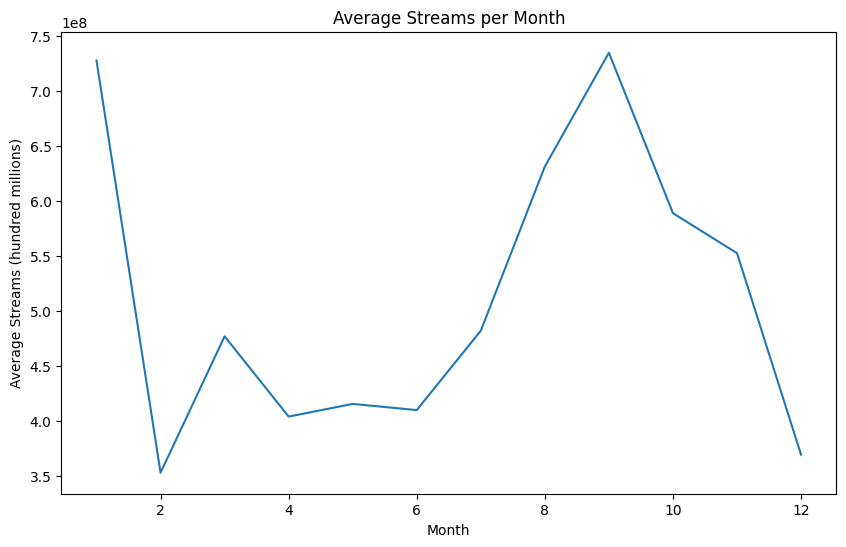

In [ ]:
# Plot the average streams per month
plt.figure(figsize=(10, 6))
plt.plot(monthly_streams.index, monthly_streams.values)
plt.xlabel('Month')
plt.ylabel('Average Streams (hundred millions)')
plt.title('Average Streams per Month')
plt.show()

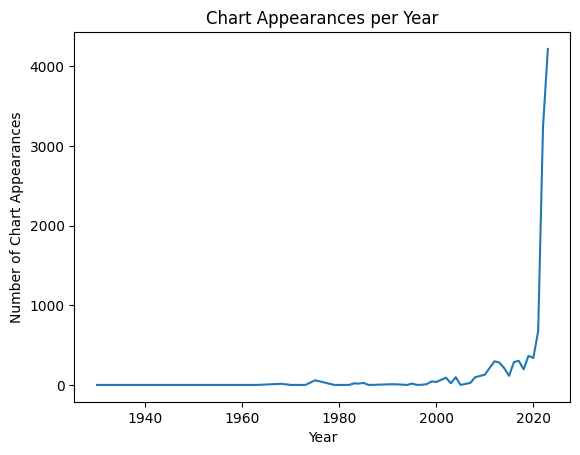

In [ ]:
chart_appearances = spotify_data.groupby('released_year')['in_spotify_charts'].sum()
plt.plot(chart_appearances.index, chart_appearances.values)
plt.xlabel('Year')
plt.ylabel('Number of Chart Appearances')
plt.title('Chart Appearances per Year')
plt.show()

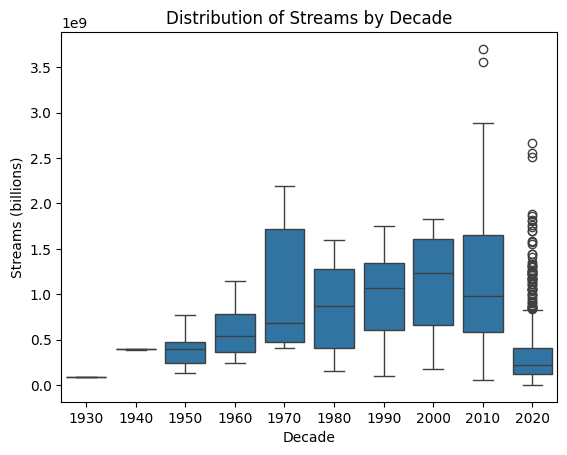

In [ ]:
# Box plot of streams by decade
spotify_data['decade'] = (spotify_data['released_year'] // 10) * 10
sns.boxplot(x='decade', y='streams', data=spotify_data)
plt.xlabel('Decade')
plt.ylabel('Streams (billions)')
plt.title('Distribution of Streams by Decade')
plt.show()

In [ ]:
artist_counts = spotify_data['artist(s)_name'].value_counts()
artist_counts

,count
artist(s)_name,
[Taylor Swift],34
[The Weeknd],22
[SZA],19
[Bad Bunny],19
[Harry Styles],17
...,...
[Southstar],1
"[Fran C, Polima WestCoast, Nickoog Clk, Pablito Pesadilla]",1
"[Marshmello, Juice WRLD]",1


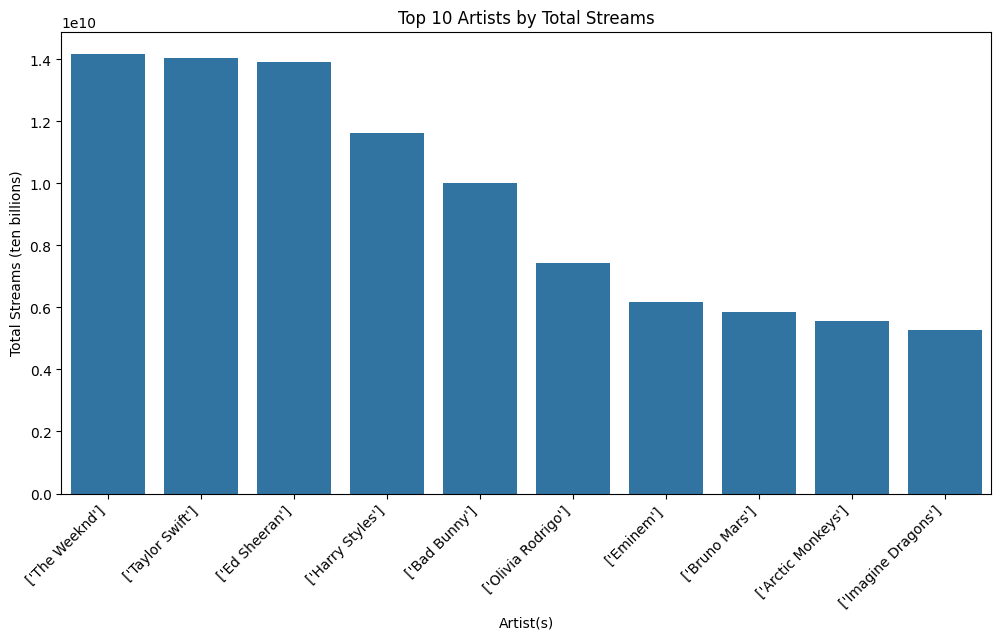

In [ ]:
#Top Artists by Stream Count (Bar Plot)
top_artists = spotify_data.groupby(spotify_data['artist(s)_name'].astype(str))['streams'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Artist(s)')
plt.ylabel('Total Streams (ten billions)')
plt.title('Top 10 Artists by Total Streams')
plt.show()

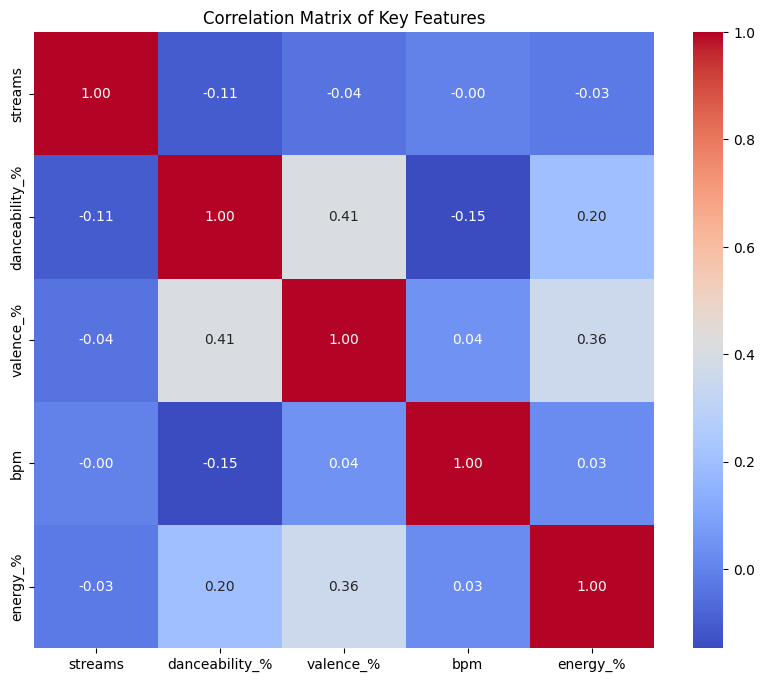

In [ ]:
#Correlation Matrix Heatmap (Shows correlation between multiple variables)
correlation_matrix = spotify_data[['streams', 'danceability_%', 'valence_%', 'bpm', 'energy_%']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Features')
plt.show()

In [ ]:
#After Spring Break

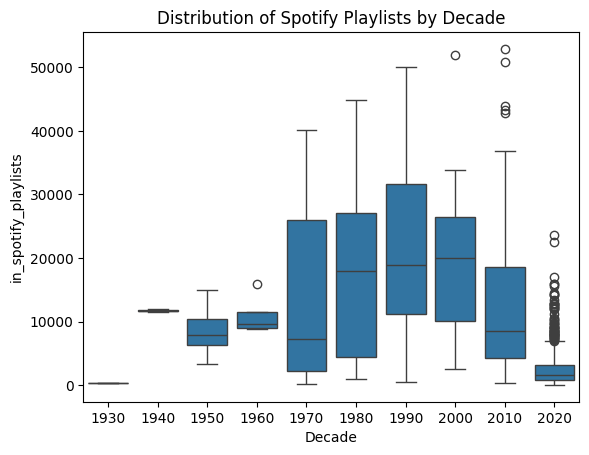

In [ ]:
spotify_data['decade'] = (spotify_data['released_year'] // 10) * 10
sns.boxplot(x='decade', y='in_spotify_playlists', data=spotify_data)
plt.xlabel('Decade')
plt.ylabel('in_spotify_playlists')
plt.title('Distribution of Spotify Playlists by Decade')
plt.show()

In [ ]:
len(spotify_data[spotify_data['released_year'] > 2017])

779

In [ ]:
len(spotify_data[spotify_data['released_year'] < 2021])

256

In [ ]:
len(spotify_data)

952

In [ ]:
artist_counts = {}

for artists_list in spotify_data['artist(s)_name']:
    if isinstance(artists_list, list) and len(artists_list) > 0:
        artist = artists_list[0]
        if artist in artist_counts:
            artist_counts[artist] += 1
        else:
            artist_counts[artist] = 1

sorted_artist_counts = dict(sorted(artist_counts.items(), key=lambda item: item[1], reverse=True))

sorted_artist_counts


{'Taylor Swift': 36,
 'The Weeknd': 34,
 'Bad Bunny': 26,
 'SZA': 23,
 'Kendrick Lamar': 23,
 'Drake': 19,
 'Harry Styles': 17,
 'Feid': 15,
 'Ed Sheeran': 13,
 'Morgan Wallen': 12,
 'Karol G': 9,
 'BTS': 9,
 'Eminem': 9,
 'Labrinth': 8,
 'Olivia Rodrigo': 7,
 'Doja Cat': 7,
 'Quevedo': 6,
 'NewJeans': 6,
 'Billie Eilish': 6,
 'Fuerza Regida': 6,
 'Dua Lipa': 6,
 'Post Malone': 6,
 'Nicki Minaj': 6,
 'Justin Bieber': 6,
 'Bruno Mars': 6,
 'Kanye West': 6,
 'Peso Pluma': 5,
 'Bizarrap': 5,
 'Rauw Alejandro': 5,
 'Future': 5,
 'Imagine Dragons': 5,
 'Arctic Monkeys': 4,
 'Tyler': 4,
 'Ariana Grande': 4,
 'Coldplay': 4,
 'Marshmello': 4,
 'Lana Del Rey': 4,
 'Adele': 4,
 'Calvin Harris': 4,
 'Daddy Yankee': 4,
 'IVE': 4,
 'Jack Harlow': 4,
 'Mï¿½ï¿½ne': 4,
 'Shawn Mendes': 4,
 'Jimin': 3,
 'Junior H': 3,
 'David Guetta': 3,
 'Charlie Puth': 3,
 'Ozuna': 3,
 'The Neighbourhood': 3,
 'Sam Smith': 3,
 'Lewis Capaldi': 3,
 'Sebastian Yatra': 3,
 'Shakira': 3,
 'Travis Scott': 3,
 'Natanael Ca

#04/07/2025 - WORK BELOW


Earn's : Feature Engineering: num_time_on_charts: add number of times the artist is on the charts

In [ ]:
spotify_data.info() #checking again to see how many charts there are

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   track_name                 952 non-null    object        
 1   artist(s)_name             952 non-null    object        
 2   artist_count               952 non-null    int64         
 3   released_year              952 non-null    int64         
 4   released_month             952 non-null    int64         
 5   released_day               952 non-null    int64         
 6   in_spotify_playlists       952 non-null    int64         
 7   in_spotify_charts          952 non-null    int64         
 8   streams                    952 non-null    int64         
 9   in_apple_playlists         952 non-null    int64         
 10  in_apple_charts            952 non-null    int64         
 11  in_deezer_playlists        952 non-null    int64         
 12  in_deezer_cha

In [ ]:
spotify_data.shape

(952, 30)

In [ ]:
spotify_data[["in_shazam_charts"]]

,in_shazam_charts
0,826
1,382
2,949
3,548
4,425
...,...
948,0
949,0
950,0
951,0


In [ ]:
spotify_data[["in_shazam_charts"]].iloc[0]

,0
in_shazam_charts,826


In [ ]:
#found out that shazam_charts is an object and not an float
spotify_data['in_shazam_charts'] = spotify_data['in_shazam_charts'].str.replace(',', '')
spotify_data['in_shazam_charts'] = pd.to_numeric(spotify_data['in_shazam_charts'])

In [ ]:
#making sure that it is a float now
spotify_data[["in_shazam_charts"]].iloc[0]

,0
in_shazam_charts,826.0


(BELOW) Basically **explodes the list of artist_names into their own rows**. So now each artist will get their own row even though they may've collaborated


The documentation to the method Earn found: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html


In [ ]:
spotify_data_exploded = spotify_data.explode('artist(s)_name')
spotify_data_exploded

spotify_data_exploded['artist(s)_name'] = spotify_data_exploded['artist(s)_name'].str.strip().str.upper()
spotify_data_exploded

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_name_length,sqrt_in_spotify_playlists,sqrt_in_spotify_charts,total_num_playlists,released_date,decade
0,seven,LATTO,2,2023,7,14,553,147,141381703,43,...,31,0,8,4,5,23.515952,12.124356,641,2023-07-01,2020
0,seven,JUNG KOOK,2,2023,7,14,553,147,141381703,43,...,31,0,8,4,5,23.515952,12.124356,641,2023-07-01,2020
1,lala,MYKE TOWERS,1,2023,3,23,1474,48,133716286,48,...,7,0,10,4,4,38.392708,6.928203,1580,2023-03-01,2020
2,vampire,OLIVIA RODRIGO,1,2023,6,30,1397,113,140003974,94,...,17,0,31,6,7,37.376463,10.630146,1582,2023-06-01,2020
3,cruel summer,TAYLOR SWIFT,1,2019,8,23,7858,100,800840817,116,...,11,0,11,15,12,88.645361,10.000000,8099,2019-08-01,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,a veces,PAULO LONDRA,2,2022,11,3,573,0,73513683,2,...,4,0,8,6,7,23.937418,0.000000,582,2022-11-01,2020
951,en la de ella,FEID,3,2022,10,20,1320,0,133895612,29,...,8,0,12,5,13,36.331804,0.000000,1366,2022-10-01,2020
951,en la de ella,SECH,3,2022,10,20,1320,0,133895612,29,...,8,0,12,5,13,36.331804,0.000000,1366,2022-10-01,2020
951,en la de ella,JHAYCO,3,2022,10,20,1320,0,133895612,29,...,8,0,12,5,13,36.331804,0.000000,1366,2022-10-01,2020


In [ ]:
spotify_data_exploded = spotify_data_exploded[spotify_data_exploded["artist(s)_name"].notna()]
spotify_data_exploded

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_name_length,sqrt_in_spotify_playlists,sqrt_in_spotify_charts,total_num_playlists,released_date,decade
0,seven,LATTO,2,2023,7,14,553,147,141381703,43,...,31,0,8,4,5,23.515952,12.124356,641,2023-07-01,2020
0,seven,JUNG KOOK,2,2023,7,14,553,147,141381703,43,...,31,0,8,4,5,23.515952,12.124356,641,2023-07-01,2020
1,lala,MYKE TOWERS,1,2023,3,23,1474,48,133716286,48,...,7,0,10,4,4,38.392708,6.928203,1580,2023-03-01,2020
2,vampire,OLIVIA RODRIGO,1,2023,6,30,1397,113,140003974,94,...,17,0,31,6,7,37.376463,10.630146,1582,2023-06-01,2020
3,cruel summer,TAYLOR SWIFT,1,2019,8,23,7858,100,800840817,116,...,11,0,11,15,12,88.645361,10.000000,8099,2019-08-01,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,a veces,PAULO LONDRA,2,2022,11,3,573,0,73513683,2,...,4,0,8,6,7,23.937418,0.000000,582,2022-11-01,2020
951,en la de ella,FEID,3,2022,10,20,1320,0,133895612,29,...,8,0,12,5,13,36.331804,0.000000,1366,2022-10-01,2020
951,en la de ella,SECH,3,2022,10,20,1320,0,133895612,29,...,8,0,12,5,13,36.331804,0.000000,1366,2022-10-01,2020
951,en la de ella,JHAYCO,3,2022,10,20,1320,0,133895612,29,...,8,0,12,5,13,36.331804,0.000000,1366,2022-10-01,2020


1. Filtering out the **0 values** the `in_apple_charts` in `spotify_data` DataFrame because that means that they're not even on the apple_chart.

  Do the same steps for:
     *   spotify
     *   deezer
     *   shazam

**NOTE**: I thought that I should do a DataFrame for each platform since some artists might appear on one but not the other (e.g. an artist could be on spotify chart but not apple chart)





In [ ]:
spotify_data_on_apple_chart = spotify_data_exploded[spotify_data_exploded["in_apple_charts"] > 0]
spotify_data_on_apple_chart.shape

(1321, 30)

In [ ]:
spotify_data_on_spotify_chart = spotify_data_exploded[spotify_data_exploded["in_spotify_charts"] > 0]
spotify_data_on_spotify_chart.shape

(850, 30)

In [ ]:
spotify_data_on_deezer_chart = spotify_data_exploded[spotify_data_exploded["in_deezer_charts"] > 0]
spotify_data_on_deezer_chart.shape

(623, 30)

In [ ]:
spotify_data_on_shazam_chart = spotify_data_exploded[spotify_data_exploded["in_shazam_charts"] > 0]
spotify_data_on_shazam_chart.shape

(839, 30)

2. Since all the artists have their own rows now, I will go ahead and group each table by `artist(s)_name` to see how many times they've appeared on the charts for each platform:

In [ ]:
num_times_artist_on_apple_chart = (spotify_data_on_apple_chart.groupby('artist(s)_name')['in_apple_charts']
                       .count()
                       .reset_index()
                       .rename(columns={'in_apple_charts': 'num_times_on_apple_chart'})
                       .sort_values(by='num_times_on_apple_chart', ascending=False)
)
num_times_artist_on_apple_chart

,artist(s)_name,num_times_on_apple_chart
57,BAD BUNNY,40
570,THE WEEKND,37
549,TAYLOR SWIFT,36
543,SZA,23
163,DRAKE,19
...,...,...
619,YOUNG MIKO,1
621,YUNG GRAVY,1
622,YURIDIA,1
623,ZACH BRYAN,1


In [ ]:
num_times_artist_on_spotify_chart = (spotify_data_on_spotify_chart.groupby('artist(s)_name')['in_spotify_charts']
                       .count()
                       .reset_index()
                       .rename(columns={'in_spotify_charts': 'num_times_on_spotify_chart'})
                       .sort_values(by='num_times_on_spotify_chart', ascending=False)
)
num_times_artist_on_spotify_chart

,artist(s)_name,num_times_on_spotify_chart
42,BAD BUNNY,30
405,TAYLOR SWIFT,23
418,THE WEEKND,18
327,PESO PLUMA,16
132,FEID,15
...,...,...
440,WIZ KHALIFA,1
441,WIZKID,1
442,XAMÏ¿½Ï¿½,1
443,XXXTENTACION,1


In [ ]:
num_times_artist_on_deezer_chart = (spotify_data_on_deezer_chart.groupby('artist(s)_name')['in_deezer_charts']
                       .count()
                       .reset_index()
                       .rename(columns={'in_deezer_charts': 'num_times_on_deezer_chart'})
                       .sort_values(by='num_times_on_deezer_chart', ascending=False)
)
num_times_artist_on_deezer_chart

,artist(s)_name,num_times_on_deezer_chart
23,BAD BUNNY,25
252,PESO PLUMA,16
101,FEID,14
313,TAYLOR SWIFT,13
319,THE WEEKND,11
...,...,...
327,TRAVIS SCOTT,1
328,TROYE SIVAN,1
329,TV GIRL,1
330,TWICE,1


In [ ]:
num_times_artist_on_shazam_chart = (spotify_data_on_shazam_chart.groupby('artist(s)_name')['in_shazam_charts']
                       .count()
                       .reset_index()
                       .rename(columns={'in_shazam_charts': 'num_times_on_shazam_chart'})
                       .sort_values(by='num_times_on_shazam_chart', ascending=False)
)
num_times_artist_on_shazam_chart

,artist(s)_name,num_times_on_shazam_chart
385,TAYLOR SWIFT,23
41,BAD BUNNY,20
398,THE WEEKND,19
314,PESO PLUMA,14
131,FEID,13
...,...,...
420,VILLANO ANTILLANO,1
419,VEIGH,1
418,VARUN JAIN,1
417,V,1


3. I will now use `.merge()` to group combine all these infos together to make it easier to interpret. I had to search up how to prevent info being lost when trying to merge tables together since if an artist appear on one chart might not appear on another (e.g. an artist appear many times on spotify chart but never on deezer chart then when I try to merge, the artist on spotify chart is completely gone)

**SOLUTION**:


```
pd.merge(_________, ________,
    how='outer'  # <-- this keeps all artists from both DataFrames
)```



In [ ]:
merged_artist_apple_spotify_charts = pd.merge(
    num_times_artist_on_apple_chart,
    num_times_artist_on_spotify_chart,
    on='artist(s)_name',
    how='outer'  # <-- this keeps all artists from both DataFrames
)
merged_artist_apple_spotify_deezer_charts = pd.merge(
    merged_artist_apple_spotify_charts,
    num_times_artist_on_deezer_chart,
    on='artist(s)_name',
    how='outer'
)

merged_all_four_artist_on_charts = pd.merge(
    merged_artist_apple_spotify_deezer_charts,
    num_times_artist_on_shazam_chart,
    on='artist(s)_name',
    how='outer'
)

merged_all_four_artist_on_charts["all four charts"] = (merged_all_four_artist_on_charts["num_times_on_apple_chart"] +
                                                       merged_all_four_artist_on_charts["num_times_on_spotify_chart"] +
                                                       merged_all_four_artist_on_charts["num_times_on_deezer_chart"] +
                                                       merged_all_four_artist_on_charts["num_times_on_shazam_chart"])
merged_all_four_artist_on_charts

,artist(s)_name,num_times_on_apple_chart,num_times_on_spotify_chart,num_times_on_deezer_chart,num_times_on_shazam_chart,all four charts
0,,1.0,1.0,NaN,NaN,NaN
1,(G)I-DLE,2.0,2.0,NaN,2.0,NaN
2,070 SHAKE,2.0,1.0,1.0,2.0,6.0
3,21 SAVAGE,12.0,4.0,2.0,8.0,26.0
4,24KGOLDN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
652,ZENDAYA,1.0,NaN,NaN,1.0,NaN
653,ZION & LENNOX,1.0,1.0,NaN,1.0,NaN
654,ZZOILO,1.0,1.0,NaN,1.0,NaN
655,ZÏ¿½Ï¿½ FE,1.0,NaN,NaN,NaN,NaN


In [ ]:
#final clean up step: changing NaN to 0s so we can work with these
merged_all_four_artist_on_charts.fillna(0, inplace=True)

In [ ]:
merged_all_four_artist_on_charts = merged_all_four_artist_on_charts[
    merged_all_four_artist_on_charts["artist(s)_name"].notna() &
    (merged_all_four_artist_on_charts["artist(s)_name"].str.strip() != "")
]
merged_all_four_artist_on_charts

,artist(s)_name,num_times_on_apple_chart,num_times_on_spotify_chart,num_times_on_deezer_chart,num_times_on_shazam_chart,all four charts
1,(G)I-DLE,2.0,2.0,0.0,2.0,0.0
2,070 SHAKE,2.0,1.0,1.0,2.0,6.0
3,21 SAVAGE,12.0,4.0,2.0,8.0,26.0
4,24KGOLDN,1.0,0.0,0.0,0.0,0.0
5,2PAC,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
652,ZENDAYA,1.0,0.0,0.0,1.0,0.0
653,ZION & LENNOX,1.0,1.0,0.0,1.0,0.0
654,ZZOILO,1.0,1.0,0.0,1.0,0.0
655,ZÏ¿½Ï¿½ FE,1.0,0.0,0.0,0.0,0.0


In [ ]:
 merged_all_four_artist_on_charts = merged_all_four_artist_on_charts.merge(spotify_data_exploded, on='artist(s)_name').drop_duplicates()

In [ ]:
merged_all_four_artist_on_charts = merged_all_four_artist_on_charts.drop_duplicates()
merged_all_four_artist_on_charts

,artist(s)_name,num_times_on_apple_chart,num_times_on_spotify_chart,num_times_on_deezer_chart,num_times_on_shazam_chart,all four charts,track_name,artist_count,released_year,released_month,...,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_name_length,sqrt_in_spotify_playlists,sqrt_in_spotify_charts,total_num_playlists,released_date,decade
0,(G)I-DLE,2.0,2.0,0.0,2.0,0.0,queencard,1,2023,5,...,3,0,27,5,9,21.236761,5.744563,468,2023-05-01,2020
1,(G)I-DLE,2.0,2.0,0.0,2.0,0.0,nxde,1,2022,10,...,4,0,48,18,4,20.736441,2.449490,453,2022-10-01,2020
2,070 SHAKE,2.0,1.0,1.0,2.0,6.0,escapism.,2,2022,10,...,14,0,9,11,9,71.617037,5.000000,5359,2022-10-01,2020
3,070 SHAKE,2.0,1.0,1.0,2.0,6.0,escapism. - sped up,2,2022,11,...,9,0,9,20,19,36.986484,0.000000,1391,2022-11-01,2020
4,21 SAVAGE,12.0,4.0,2.0,8.0,26.0,creepin',3,2022,12,...,36,0,8,5,8,77.691698,9.380832,6394,2022-12-01,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,ZENDAYA,1.0,0.0,0.0,1.0,0.0,all for us - from the hbo original series euph...,2,2019,8,...,2,0,34,9,50,73.088987,0.000000,5382,2019-08-01,2010
1430,ZION & LENNOX,1.0,1.0,0.0,1.0,0.0,yo voy,1,2004,5,...,4,0,5,24,6,54.350713,1.414214,2972,2004-05-01,2000
1431,ZZOILO,1.0,1.0,0.0,1.0,0.0,mon amour - remix,2,2020,9,...,12,0,10,10,17,56.753854,1.414214,3427,2020-09-01,2020
1432,ZÏ¿½Ï¿½ FE,1.0,0.0,0.0,0.0,0.0,malvada,1,2022,1,...,16,0,8,5,7,24.515301,0.000000,693,2022-01-01,2020


In [ ]:
merged_all_four_artist_on_charts[['in_spotify_charts']]

,in_spotify_charts
0,33
1,6
2,25
3,0
4,88
...,...
1429,0
1430,2
1431,2
1432,0


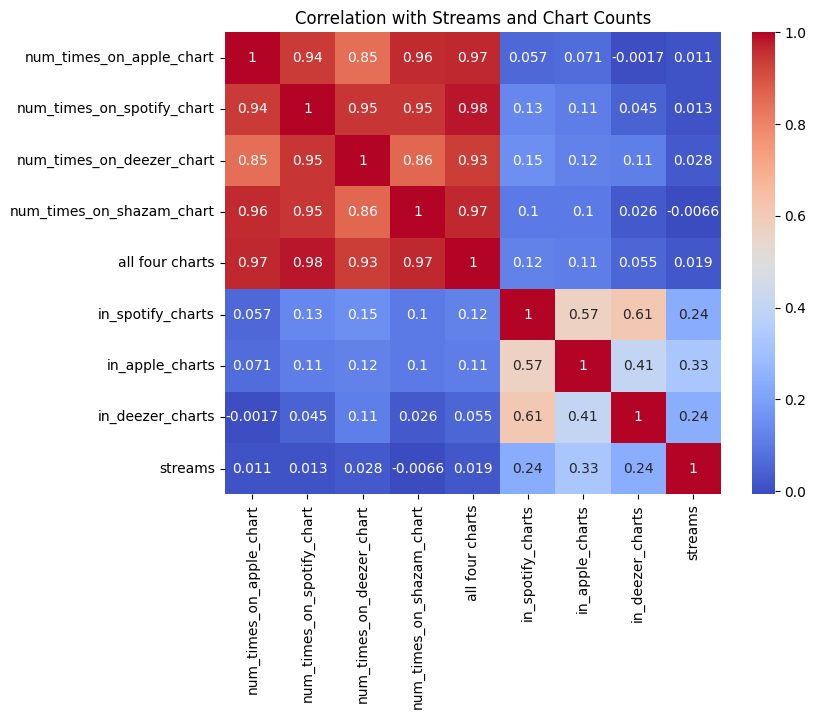

In [ ]:
chart_cols = [
    'num_times_on_apple_chart',
    'num_times_on_spotify_chart',
    'num_times_on_deezer_chart',
    'num_times_on_shazam_chart',
    'all four charts',
    'in_spotify_charts',
    'in_apple_charts',
    'in_deezer_charts'
]

plt.figure(figsize=(8, 6))
sns.heatmap(merged_all_four_artist_on_charts[chart_cols + ['streams']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation with Streams and Chart Counts")
plt.show()

<Axes: xlabel='num_times_on_deezer_chart', ylabel='streams'>

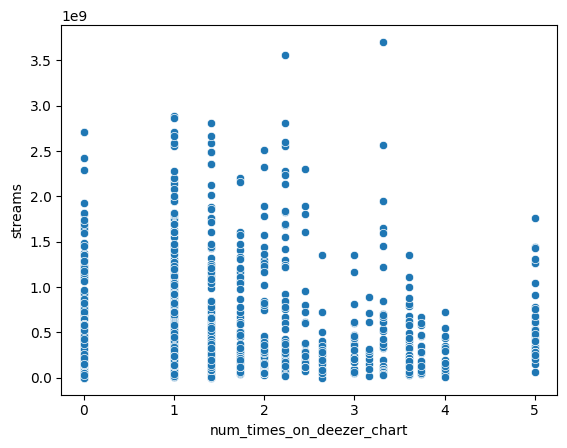

In [ ]:
#to see the scatterplot
sns.scatterplot(data = merged_all_four_artist_on_charts, x = np.sqrt(merged_all_four_artist_on_charts['num_times_on_deezer_chart']), y ='streams')

Some useful functions made-up:

In [ ]:
#oneHotEncode function

from sklearn.preprocessing import OneHotEncoder

def ohe(data, col):
    oh_enc = OneHotEncoder()
    oh_enc.fit(data[[col]])
    oh_data = oh_enc.transform(data[[col]]).toarray()
    oh_df = pd.DataFrame(data = oh_data, columns =
                         oh_enc.get_feature_names_out(),
                         index = data.index)
    w_ohe = data.join(oh_df)
    return w_ohe, oh_enc.get_feature_names_out().tolist()

In [ ]:
def top_correlated_features(df, target_col, top_n=10):
    numeric_df = df.select_dtypes(include=[np.number])
    corrs = numeric_df.corr()[target_col].drop(target_col)
    top_features = corrs.abs().sort_values(ascending=False).head(top_n).index.tolist()
    return top_features

#Top correlated features for `spotify_data`:



In [ ]:
top_features = top_correlated_features(spotify_data, 'streams', top_n=15)
print("Top correlated features in spotify_data:", top_features)

Top correlated features in spotify_data: ['sqrt_in_spotify_playlists', 'in_spotify_playlists', 'total_num_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'in_apple_charts', 'sqrt_in_spotify_charts', 'decade', 'in_spotify_charts', 'released_year', 'in_deezer_charts', 'artist_count', 'speechiness_%', 'danceability_%', 'liveness_%']


#Top correlated features for `merged_all_four_artist_on_charts`:


In [ ]:
#removing other unncessary charts that can cause collinearity anways + makes this easier to join table
merged_all_four_artist_on_charts_copy = merged_all_four_artist_on_charts.copy()
merged_all_four_artist_on_charts_copy = (merged_all_four_artist_on_charts_copy.drop(
    columns=['num_times_on_apple_chart', 'num_times_on_spotify_chart', 'num_times_on_deezer_chart', 'num_times_on_shazam_chart', 'streams']))
merged_all_four_artist_on_charts_copy

,artist(s)_name,all four charts,track_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,...,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_name_length,sqrt_in_spotify_playlists,sqrt_in_spotify_charts,total_num_playlists,released_date,decade
0,(G)I-DLE,0.0,queencard,1,2023,5,15,451,33,10,...,3,0,27,5,9,21.236761,5.744563,468,2023-05-01,2020
1,(G)I-DLE,0.0,nxde,1,2022,10,17,430,6,14,...,4,0,48,18,4,20.736441,2.449490,453,2022-10-01,2020
2,070 SHAKE,6.0,escapism.,2,2022,10,12,5129,25,116,...,14,0,9,11,9,71.617037,5.000000,5359,2022-10-01,2020
3,070 SHAKE,6.0,escapism. - sped up,2,2022,11,25,1368,0,12,...,9,0,9,20,19,36.986484,0.000000,1391,2022-11-01,2020
4,21 SAVAGE,26.0,creepin',3,2022,12,2,6036,88,113,...,36,0,8,5,8,77.691698,9.380832,6394,2022-12-01,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,ZENDAYA,0.0,all for us - from the hbo original series euph...,2,2019,8,4,5342,0,33,...,2,0,34,9,50,73.088987,0.000000,5382,2019-08-01,2010
1430,ZION & LENNOX,0.0,yo voy,1,2004,5,4,2954,2,18,...,4,0,5,24,6,54.350713,1.414214,2972,2004-05-01,2000
1431,ZZOILO,0.0,mon amour - remix,2,2020,9,21,3221,2,67,...,12,0,10,10,17,56.753854,1.414214,3427,2020-09-01,2020
1432,ZÏ¿½Ï¿½ FE,0.0,malvada,1,2022,1,28,601,0,28,...,16,0,8,5,7,24.515301,0.000000,693,2022-01-01,2020


In [ ]:
merged_all_four_artist_on_charts_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1431 entries, 0 to 1433
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   artist(s)_name             1431 non-null   object        
 1   all four charts            1431 non-null   float64       
 2   track_name                 1431 non-null   object        
 3   artist_count               1431 non-null   int64         
 4   released_year              1431 non-null   int64         
 5   released_month             1431 non-null   int64         
 6   released_day               1431 non-null   int64         
 7   in_spotify_playlists       1431 non-null   int64         
 8   in_spotify_charts          1431 non-null   int64         
 9   in_apple_playlists         1431 non-null   int64         
 10  in_apple_charts            1431 non-null   int64         
 11  in_deezer_playlists        1431 non-null   int64         
 12  in_deezer_c

Joining `spotify_data_exploded` with `merged_all_four_artist_on_charts_copy` to get more useful informations + total number of charts artist is in

In [ ]:
# Step 1: Clean artist name columns in both DataFrames
spotify_data_exploded['artist_name'] = spotify_data_exploded['artist(s)_name'].str.lower().str.strip()
merged_all_four_artist_on_charts_copy['artist_name'] = merged_all_four_artist_on_charts_copy['artist(s)_name'].str.lower().str.strip()

# Step 2: Select only needed columns from artist chart data
artist_chart_clean = merged_all_four_artist_on_charts_copy[['artist_name', 'all four charts']].drop_duplicates()

# Step 3: Merge on cleaned artist name
merged_final = pd.merge(
    spotify_data_exploded,
    artist_chart_clean,
    on='artist_name',
    how='left'
)

# Step 4: Fill NaNs in the merged 'all four charts' column
merged_final['all four charts'] = merged_final['all four charts'].fillna(0)

# Step 5: Drop any duplicate columns if accidentally merged (just in case)
merged_final = merged_final.loc[:, ~merged_final.columns.duplicated()]
merged_final

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,liveness_%,speechiness_%,track_name_length,sqrt_in_spotify_playlists,sqrt_in_spotify_charts,total_num_playlists,released_date,decade,artist_name,all four charts
0,seven,LATTO,2,2023,7,14,553,147,141381703,43,...,8,4,5,23.515952,12.124356,641,2023-07-01,2020,latto,4.0
1,seven,JUNG KOOK,2,2023,7,14,553,147,141381703,43,...,8,4,5,23.515952,12.124356,641,2023-07-01,2020,jung kook,13.0
2,lala,MYKE TOWERS,1,2023,3,23,1474,48,133716286,48,...,10,4,4,38.392708,6.928203,1580,2023-03-01,2020,myke towers,13.0
3,vampire,OLIVIA RODRIGO,1,2023,6,30,1397,113,140003974,94,...,31,6,7,37.376463,10.630146,1582,2023-06-01,2020,olivia rodrigo,17.0
4,cruel summer,TAYLOR SWIFT,1,2019,8,23,7858,100,800840817,116,...,11,15,12,88.645361,10.000000,8099,2019-08-01,2010,taylor swift,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,a veces,PAULO LONDRA,2,2022,11,3,573,0,73513683,2,...,8,6,7,23.937418,0.000000,582,2022-11-01,2020,paulo londra,0.0
1477,en la de ella,FEID,3,2022,10,20,1320,0,133895612,29,...,12,5,13,36.331804,0.000000,1366,2022-10-01,2020,feid,61.0
1478,en la de ella,SECH,3,2022,10,20,1320,0,133895612,29,...,12,5,13,36.331804,0.000000,1366,2022-10-01,2020,sech,8.0
1479,en la de ella,JHAYCO,3,2022,10,20,1320,0,133895612,29,...,12,5,13,36.331804,0.000000,1366,2022-10-01,2020,jhayco,0.0


In [ ]:
top_features_charts= top_correlated_features(merged_final, 'streams', top_n=15)
print("Top correlated features in merged_final:")
for feature in top_features_charts:
    print("-", feature)

Top correlated features in merged_final:
- sqrt_in_spotify_playlists
- in_apple_playlists
- in_spotify_playlists
- total_num_playlists
- in_deezer_playlists
- in_apple_charts
- sqrt_in_spotify_charts
- in_spotify_charts
- decade
- in_deezer_charts
- released_year
- artist_count
- danceability_%
- speechiness_%
- instrumentalness_%


In [ ]:
merged_final[["in_apple_charts", "in_spotify_charts", "streams"]]

,in_apple_charts,in_spotify_charts,streams
0,263,147,141381703
1,263,147,141381703
2,126,48,133716286
3,207,113,140003974
4,207,100,800840817
...,...,...,...
1476,0,0,73513683
1477,26,0,133895612
1478,26,0,133895612
1479,26,0,133895612


In [ ]:
#to see if there any duplicated columns
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   track_name                 1481 non-null   object        
 1   artist(s)_name             1481 non-null   object        
 2   artist_count               1481 non-null   int64         
 3   released_year              1481 non-null   int64         
 4   released_month             1481 non-null   int64         
 5   released_day               1481 non-null   int64         
 6   in_spotify_playlists       1481 non-null   int64         
 7   in_spotify_charts          1481 non-null   int64         
 8   streams                    1481 non-null   int64         
 9   in_apple_playlists         1481 non-null   int64         
 10  in_apple_charts            1481 non-null   int64         
 11  in_deezer_playlists        1481 non-null   int64         
 12  in_dee

#Random Forest: Regressor & Classifier

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
df = merged_final  # Replace with your actual file path or DataFrame

#Remove outliers
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])


#oneHotEncode
df, released_month_ohe = ohe(df, 'released_month')

# Preview the dataset
df.head()

# Handle missing values (if any)
df = df.dropna()

selected_features = ['total_num_playlists', 'released_year', 'all four charts'] + released_month_ohe

# Define features (X) and target variable (y)
X = df[selected_features]  # Make sure your target column is named 'streams'
y = df['streams']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

# Cross-validation to evaluate overall model robustness
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
print("Average RMSE from 5-fold CV:", -np.mean(cv_scores))


# Feature Importance (optional)
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print(feature_importance_df)

# Training score
train_r2 = model.score(X_train, y_train)
print(f"Training R^2: {train_r2:.3f}")
print(f"Test R^2: {r2:.3f}")

Root Mean Squared Error (RMSE): 194552557.47536412
R^2 Score: 0.8626909841773694
Average RMSE from 5-fold CV: 244257666.34671456
                Feature  Importance
0   total_num_playlists    0.819886
1         released_year    0.086170
2       all four charts    0.043852
3      released_month_1    0.007060
10     released_month_8    0.006058
8      released_month_6    0.005820
7      released_month_5    0.004396
11     released_month_9    0.003927
13    released_month_11    0.003878
12    released_month_10    0.003643
14    released_month_12    0.003621
5      released_month_3    0.003385
9      released_month_7    0.003232
6      released_month_4    0.003232
4      released_month_2    0.001840
Training R^2: 0.980
Test R^2: 0.863


Accuracy: 0.9375

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       197
           1       0.84      0.90      0.87        59

    accuracy                           0.94       256
   macro avg       0.91      0.92      0.91       256
weighted avg       0.94      0.94      0.94       256


Confusion Matrix:
 [[187  10]
 [  6  53]]

Average Accuracy from 5-fold CV: 0.862


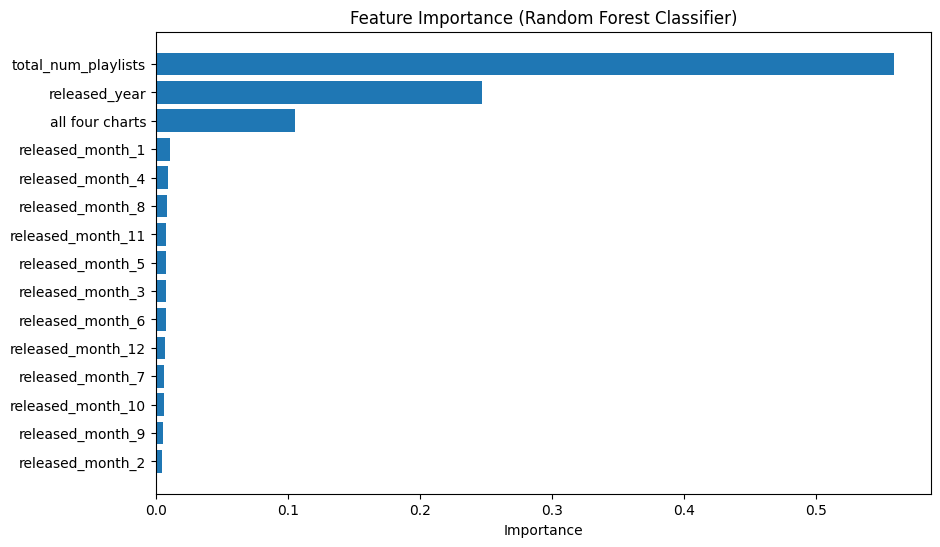

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
df = merged_final.copy()

# Remove outliers in 'streams' (optional for classification)
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])

# Create binary target: is_hit = 1 if streams > 500M, else 0
df['is_hit'] = np.where(df['streams'] >= 500_000_000, 1, 0)

# One-hot encode 'released_month'
df, released_month_ohe = ohe(df, 'released_month')

# Handle missing values
df = df.dropna()

# Feature selection
selected_features = ['total_num_playlists', 'released_year', 'all four charts'] + released_month_ohe
X = df[selected_features]
y = df['is_hit']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Cross-validation scores
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"\nAverage Accuracy from 5-fold CV: {np.mean(cv_scores):.3f}")

# Feature importance plot
importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest Classifier)")
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
df = merged_final  # Replace with your actual file path or DataFrame

#Remove outliers
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])


#oneHotEncode
df, released_month_ohe = ohe(df, 'released_month')

# Preview the dataset
df.head()

# Handle missing values (if any)
df = df.dropna()

selected_features = ['total_num_playlists', 'released_year', 'all four charts', 'artist_count'] + released_month_ohe

# Define features (X) and target variable (y)
X = df[selected_features]  # Make sure your target column is named 'streams'
y = df['streams']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

# Cross-validation to evaluate overall model robustness
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
print("Average RMSE from 5-fold CV:", -np.mean(cv_scores))


# Feature Importance (optional)
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print(feature_importance_df)

# Training score
train_r2 = model.score(X_train, y_train)
print(f"Training R^2: {train_r2:.3f}")
print(f"Test R^2: {r2:.3f}")

Root Mean Squared Error (RMSE): 190989378.52516162
R^2 Score: 0.8676744837332577
Average RMSE from 5-fold CV: 242880452.3777705
                Feature  Importance
0   total_num_playlists    0.811808
1         released_year    0.083136
2       all four charts    0.040014
3          artist_count    0.017807
4      released_month_1    0.006477
11     released_month_8    0.006096
9      released_month_6    0.005471
8      released_month_5    0.004519
14    released_month_11    0.003826
12     released_month_9    0.003696
13    released_month_10    0.003500
10     released_month_7    0.003222
6      released_month_3    0.003218
15    released_month_12    0.002711
7      released_month_4    0.002701
5      released_month_2    0.001797
Training R^2: 0.981
Test R^2: 0.868


Accuracy: 0.94921875

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       197
           1       0.87      0.92      0.89        59

    accuracy                           0.95       256
   macro avg       0.92      0.94      0.93       256
weighted avg       0.95      0.95      0.95       256


Confusion Matrix:
 [[189   8]
 [  5  54]]

Average Accuracy from 5-fold CV: 0.872


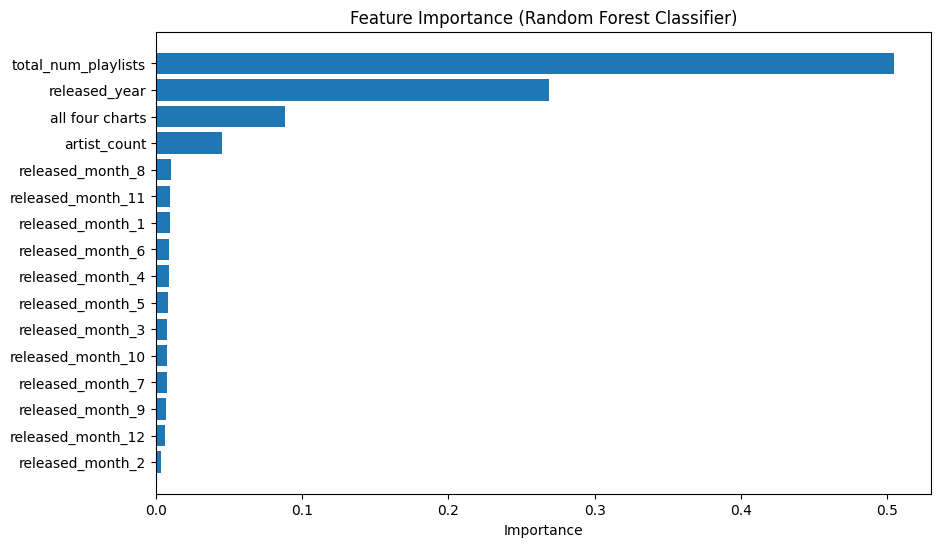

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
df = merged_final.copy()

# Remove outliers in 'streams' (optional for classification)
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])

# Create binary target: is_hit = 1 if streams > 500M, else 0
df['is_hit'] = np.where(df['streams'] >= 500_000_000, 1, 0)

# One-hot encode 'released_month'
df, released_month_ohe = ohe(df, 'released_month')

# Handle missing values
df = df.dropna()

# Feature selection
selected_features = ['total_num_playlists', 'released_year', 'all four charts', 'artist_count'] + released_month_ohe
X = df[selected_features]
y = df['is_hit']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Cross-validation scores
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"\nAverage Accuracy from 5-fold CV: {np.mean(cv_scores):.3f}")

# Feature importance plot
importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest Classifier)")
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
df = spotify_data  # Replace with your actual file path or DataFrame

#Remove outliers
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])


#oneHotEncode
df, released_month_ohe = ohe(df, 'released_month')

# Preview the dataset
df.head()

# Handle missing values (if any)
df = df.dropna()

selected_features = ['total_num_playlists', 'released_year'] + released_month_ohe

# Define features (X) and target variable (y)
X = df[selected_features]  # Make sure your target column is named 'streams'
y = df['streams']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

# Cross-validation to evaluate overall model robustness
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
print("Average RMSE from 5-fold CV:", -np.mean(cv_scores))


# Feature Importance (optional)
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print(feature_importance_df)

# Training score
train_r2 = model.score(X_train, y_train)
print(f"Training R^2: {train_r2:.3f}")
print(f"Test R^2: {r2:.3f}")

Root Mean Squared Error (RMSE): 227417653.66512403
R^2 Score: 0.8291358317401435
Average RMSE from 5-fold CV: 256429063.88073444
                Feature  Importance
0   total_num_playlists    0.839378
1         released_year    0.099037
9      released_month_8    0.008233
12    released_month_11    0.007026
7      released_month_6    0.006485
13    released_month_12    0.005805
6      released_month_5    0.005530
5      released_month_4    0.005288
2      released_month_1    0.004595
4      released_month_3    0.004501
8      released_month_7    0.004141
11    released_month_10    0.004072
10     released_month_9    0.003954
3      released_month_2    0.001955
Training R^2: 0.962
Test R^2: 0.829


Accuracy: 0.8780487804878049

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       107
           1       0.84      0.81      0.82        57

    accuracy                           0.88       164
   macro avg       0.87      0.86      0.86       164
weighted avg       0.88      0.88      0.88       164


Confusion Matrix:
 [[98  9]
 [11 46]]

Average Accuracy from 5-fold CV: 0.860


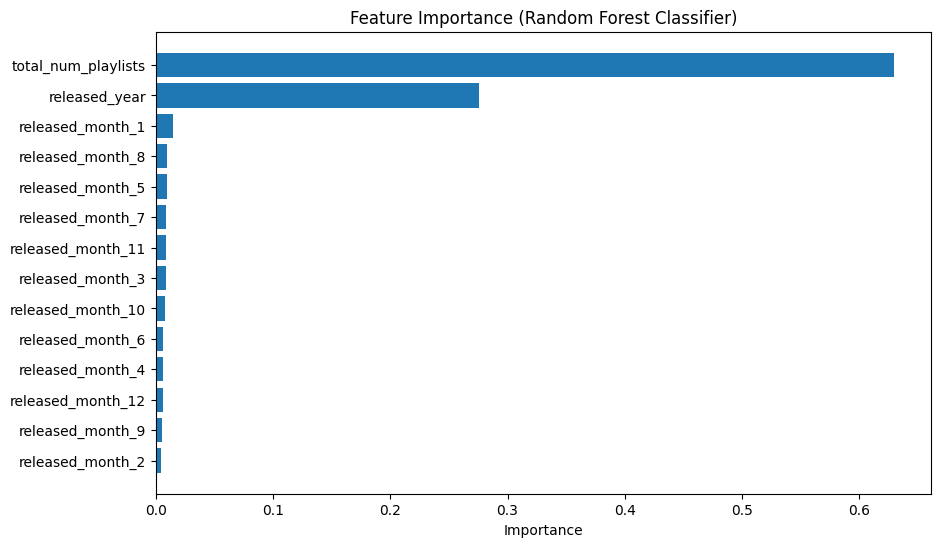

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
df = spotify_data.copy()

# Remove outliers in 'streams' (optional for classification)
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])

# Create binary target: is_hit = 1 if streams > 500M, else 0
df['is_hit'] = np.where(df['streams'] >= 500_000_000, 1, 0)

# One-hot encode 'released_month'
df, released_month_ohe = ohe(df, 'released_month')

# Handle missing values
df = df.dropna()

# Feature selection
selected_features = ['total_num_playlists', 'released_year'] + released_month_ohe
X = df[selected_features]
y = df['is_hit']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Cross-validation scores
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"\nAverage Accuracy from 5-fold CV: {np.mean(cv_scores):.3f}")

# Feature importance plot
importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest Classifier)")
plt.show()


In [ ]:
#function to change month to seasons since it seems that each month contribute very little alone, so maybe it'll be betterif they're together
def map_month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
      return "Unknown"

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
df = merged_final  # Replace with your actual file path or DataFrame

#Remove outliers
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])

# Apply season mapping
df['release_season'] = df['released_month'].apply(map_month_to_season)

# One-hot encode seasons
df, release_season_ohe = ohe(df, 'release_season')

# Use in your feature set

#oneHotEncode
df, released_month_ohe = ohe(df, 'released_month')

# Preview the dataset
df.head()

# Handle missing values (if any)
df = df.dropna()

selected_features = ['total_num_playlists', 'released_year','all four charts', 'artist_count'] + release_season_ohe

# Define features (X) and target variable (y)
X = df[selected_features]  # Make sure your target column is named 'streams'
y = df['streams']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

# Cross-validation to evaluate overall model robustness
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
print("Average RMSE from 5-fold CV:", -np.mean(cv_scores))


# Feature Importance (optional)
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print(feature_importance_df)

# Training score
train_r2 = model.score(X_train, y_train)
print(f"Training R^2: {train_r2:.3f}")
print(f"Test R^2: {r2:.3f}")

Root Mean Squared Error (RMSE): 196426919.68960604
R^2 Score: 0.8600325087641197
Average RMSE from 5-fold CV: 242293279.89815718
                 Feature  Importance
0    total_num_playlists    0.820452
1          released_year    0.085394
2        all four charts    0.044950
3           artist_count    0.020862
7  release_season_Winter    0.008609
6  release_season_Summer    0.007356
5  release_season_Spring    0.006632
4    release_season_Fall    0.005745
Training R^2: 0.981
Test R^2: 0.860


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
df = merged_final  # Replace with your actual file path or DataFrame

#Remove outliers
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])

# Apply season mapping
df['release_season'] = df['released_month'].apply(map_month_to_season)


# One-hot encode seasons
df, release_season_ohe = ohe(df, 'release_season')

# Use in your feature set

#oneHotEncode
df, released_month_ohe = ohe(df, 'released_month')

# Preview the dataset
df.head()

# Handle missing values (if any)
df = df.dropna()

selected_features = ['total_num_playlists', 'released_year','in_apple_charts', 'in_spotify_charts', 'artist_count'] + release_season_ohe


# Define features (X) and target variable (y)
X = df[selected_features]  # Make sure your target column is named 'streams'
y = df['streams']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

# Cross-validation to evaluate overall model robustness
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
print("Average RMSE from 5-fold CV:", -np.mean(cv_scores))


# Feature Importance (optional)
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print(feature_importance_df)

# Training score
train_r2 = model.score(X_train, y_train)
print(f"Training R^2: {train_r2:.3f}")
print(f"Test R^2: {r2:.3f}")

Root Mean Squared Error (RMSE): 176587166.5909618
R^2 Score: 0.8868789461620529
Average RMSE from 5-fold CV: 228488195.99492893
                 Feature  Importance
0    total_num_playlists    0.804047
1          released_year    0.076200
3      in_spotify_charts    0.047632
2        in_apple_charts    0.038119
4           artist_count    0.010630
8  release_season_Winter    0.008379
6  release_season_Spring    0.006200
7  release_season_Summer    0.005794
5    release_season_Fall    0.003001
Training R^2: 0.984
Test R^2: 0.887


In [ ]:
#trying with in_apple_chart

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
df = merged_final  # Replace with your actual file path or DataFrame

#Remove outliers
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])


#logging streams
df['log_streams'] = np.log1p(df['streams'])

# Apply season mapping
df['release_season'] = df['released_month'].apply(map_month_to_season)

# One-hot encode seasons
df, release_season_ohe = ohe(df, 'release_season')

# Use in your feature set

#oneHotEncode
df, released_month_ohe = ohe(df, 'released_month')

# Avoid division by zero by adding a small constant
df['in_apple_charts'] = 1 / (df['in_apple_charts'] + 1e-5)
df['in_spotify_charts'] = 1 / (df['in_spotify_charts'] + 1e-5)

# Preview the dataset
df.head()

# Handle missing values (if any)
df = df.dropna()

selected_features = ['total_num_playlists', 'released_year','in_apple_charts', 'in_spotify_charts', 'artist_count'] + release_season_ohe

# Define features (X) and target variable (y)
X = df[selected_features]  # Make sure your target column is named 'streams'
y = df['log_streams']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set (log scale)
y_pred_log = model.predict(X_test)

# De-log both predictions and ground truth
y_pred = np.expm1(y_pred_log)      # back to original scale
y_test_exp = np.expm1(y_test)      # back to original scale

# ✅ Evaluate in original scale (streams)
rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred))
r2 = r2_score(y_test_exp, y_pred)


print(f"RMSE (original scale): {rmse}")
print(f"R^2 (original scale): {r2}")

'''
cv_scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
print("Average RMSE from 5-fold CV:", -np.mean(cv_scores))
'''

from sklearn.model_selection import cross_val_predict

# Cross-validated predictions (still in log scale)
y_pred_cv_log = cross_val_predict(model, X, y, cv=5)

# De-log predictions and true values
y_pred_cv = np.expm1(y_pred_cv_log)
y_true_cv = np.expm1(y)  # full y since cross_val_predict returns predictions for full set

# Compute RMSE in original units
rmse_cv = np.sqrt(mean_squared_error(y_true_cv, y_pred_cv))
print(f"Cross-validated RMSE (original scale): {rmse_cv:.2f}")


# Feature Importance (optional)
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print(feature_importance_df)

# Training score
train_r2 = model.score(X_train, y_train)
print(f"Training R^2: {train_r2:.3f}")
print(f"Test R^2: {r2:.3f}")


'''
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

# Cross-validation to evaluate overall model robustness
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
print("Average RMSE from 5-fold CV:", -np.mean(cv_scores))


# Feature Importance (optional)
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print(feature_importance_df)

# Training score
train_r2 = model.score(X_train, y_train)
print(f"Training R^2: {train_r2:.3f}")
print(f"Test R^2: {r2:.3f}")
'''

RMSE (original scale): 179802905.84949166
R^2 (original scale): 0.8827214525413419
Cross-validated RMSE (original scale): 238121245.34
                 Feature  Importance
0    total_num_playlists    0.710769
2        in_apple_charts    0.078905
1          released_year    0.076030
3      in_spotify_charts    0.071724
4           artist_count    0.023674
8  release_season_Winter    0.016959
7  release_season_Summer    0.013329
6  release_season_Spring    0.005628
5    release_season_Fall    0.002982
Training R^2: 0.975
Test R^2: 0.883


'\n# Predict on the test set\ny_pred = model.predict(X_test)\n\n# Evaluate the model\nrmse = np.sqrt(mean_squared_error(y_test, y_pred))\nr2 = r2_score(y_test, y_pred)\n\nprint(f"Root Mean Squared Error (RMSE): {rmse}")\nprint(f"R^2 Score: {r2}")\n\n# Cross-validation to evaluate overall model robustness\nfrom sklearn.model_selection import cross_val_score\n\ncv_scores = cross_val_score(model, X, y, scoring=\'neg_root_mean_squared_error\', cv=5)\nprint("Average RMSE from 5-fold CV:", -np.mean(cv_scores))\n\n\n# Feature Importance (optional)\nimportances = model.feature_importances_\nfeature_names = X.columns\n\nfeature_importance_df = pd.DataFrame({\'Feature\': feature_names, \'Importance\': importances})\nfeature_importance_df = feature_importance_df.sort_values(\'Importance\', ascending=False)\nprint(feature_importance_df)\n\n# Training score\ntrain_r2 = model.score(X_train, y_train)\nprint(f"Training R^2: {train_r2:.3f}")\nprint(f"Test R^2: {r2:.3f}")\n'

Accuracy: 0.95703125

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       197
           1       0.88      0.95      0.91        59

    accuracy                           0.96       256
   macro avg       0.93      0.95      0.94       256
weighted avg       0.96      0.96      0.96       256


Confusion Matrix:
 [[189   8]
 [  3  56]]

Average Accuracy from 5-fold CV: 0.883


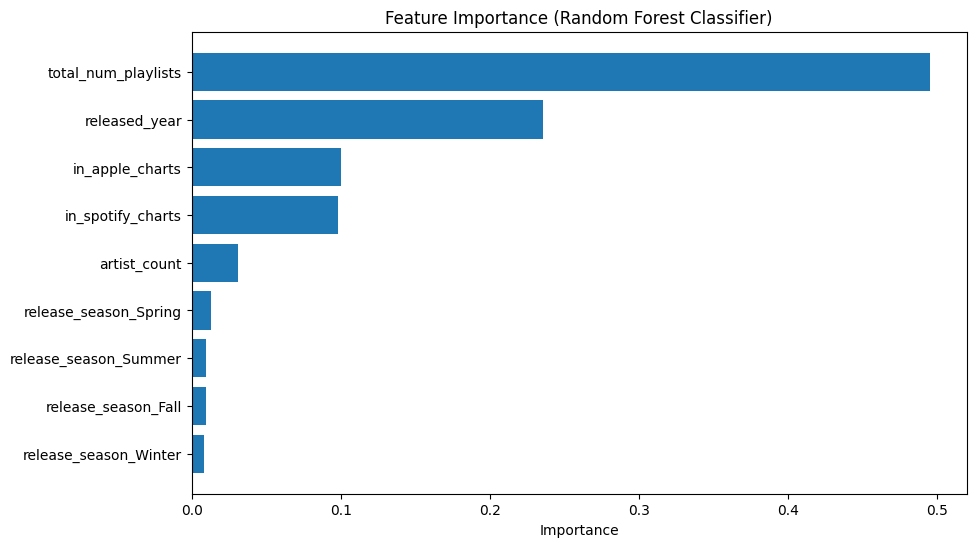

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
df = merged_final.copy()

# Remove outliers in 'streams' (optional for classification)
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])


# Create binary target: is_hit = 1 if streams > 500M, else 0
df['is_hit'] = np.where(df['streams'] >= 500_000_000, 1, 0)


# Apply season mapping
df['release_season'] = df['released_month'].apply(map_month_to_season)

# One-hot encode seasons
df, release_season_ohe = ohe(df, 'release_season')

# One-hot encode 'released_month'
df, released_month_ohe = ohe(df, 'released_month')

# Avoid division by zero by adding a small constant
df['in_apple_charts'] = 1 / (df['in_apple_charts'] + 1e-5)
df['in_spotify_charts'] = 1 / (df['in_spotify_charts'] + 1e-5)


# Handle missing values
df = df.dropna()

# Feature selection

selected_features = ['total_num_playlists', 'released_year','in_apple_charts', 'in_spotify_charts', 'artist_count'] + release_season_ohe

X = df[selected_features]
y = df['is_hit']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Cross-validation scores
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"\nAverage Accuracy from 5-fold CV: {np.mean(cv_scores):.3f}")

# Feature importance plot
importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest Classifier)")
plt.show()


Accuracy: 0.95703125

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       197
           1       0.88      0.95      0.91        59

    accuracy                           0.96       256
   macro avg       0.93      0.95      0.94       256
weighted avg       0.96      0.96      0.96       256


Confusion Matrix:
 [[189   8]
 [  3  56]]

Average Accuracy from 5-fold CV: 0.883


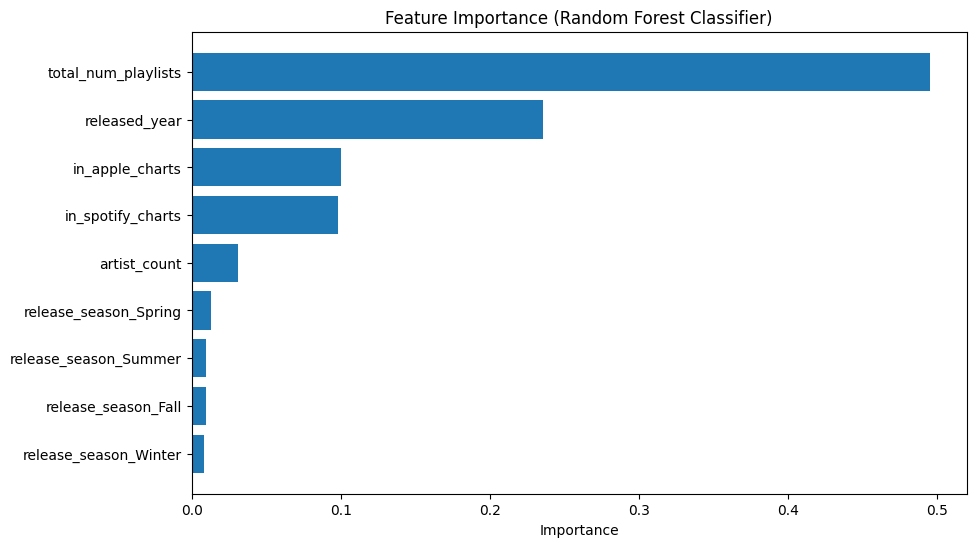

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
df = merged_final.copy()

# Remove outliers in 'streams' (optional for classification)
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])


# Create binary target: is_hit = 1 if streams > 500M, else 0
df['is_hit'] = np.where(df['streams'] >= 500_000_000, 1, 0)


# Apply season mapping
df['release_season'] = df['released_month'].apply(map_month_to_season)

# One-hot encode seasons
df, release_season_ohe = ohe(df, 'release_season')

# One-hot encode 'released_month'
df, released_month_ohe = ohe(df, 'released_month')

# Avoid division by zero by adding a small constant
df['in_apple_charts'] = 1 / (df['in_apple_charts'] + 1e-5)
df['in_spotify_charts'] = 1 / (df['in_spotify_charts'] + 1e-5)

# Handle missing values
df = df.dropna()

# Feature selection

selected_features = ['total_num_playlists', 'released_year','in_apple_charts', 'in_spotify_charts', 'artist_count'] + release_season_ohe

X = df[selected_features]
y = df['is_hit']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Cross-validation scores
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"\nAverage Accuracy from 5-fold CV: {np.mean(cv_scores):.3f}")

# Feature importance plot
importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest Classifier)")
plt.show()


Accuracy: 0.953125

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       197
           1       0.89      0.92      0.90        59

    accuracy                           0.95       256
   macro avg       0.93      0.94      0.93       256
weighted avg       0.95      0.95      0.95       256


Confusion Matrix:
 [[190   7]
 [  5  54]]

Average Accuracy from 5-fold CV: 0.875


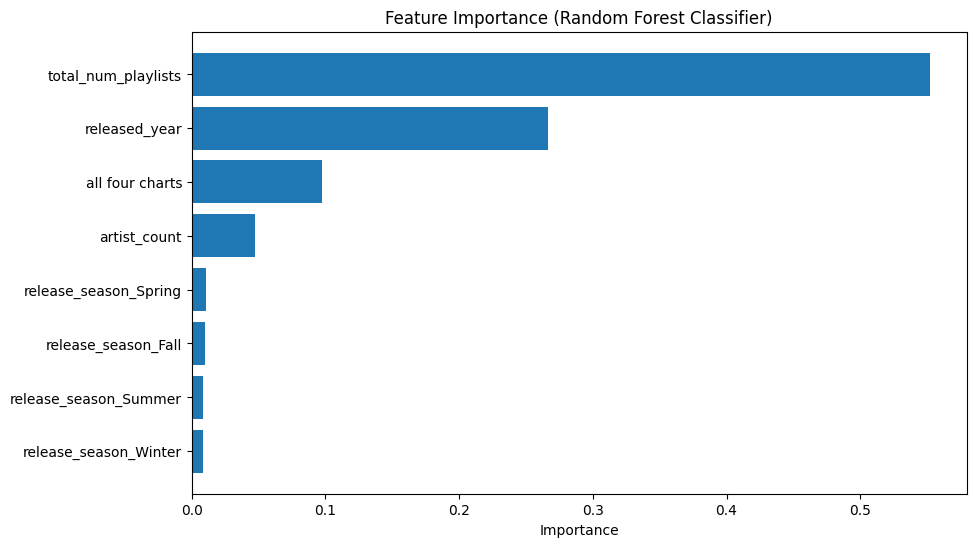

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
df = merged_final.copy()

# Remove outliers in 'streams' (optional for classification)
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])

# Create binary target: is_hit = 1 if streams > 500M, else 0
df['is_hit'] = np.where(df['streams'] >= 500_000_000, 1, 0)

# Apply season mapping
df['release_season'] = df['released_month'].apply(map_month_to_season)

# One-hot encode seasons
df, release_season_ohe = ohe(df, 'release_season')

# One-hot encode 'released_month'
df, released_month_ohe = ohe(df, 'released_month')

# Handle missing values
df = df.dropna()

# Feature selection

selected_features = ['total_num_playlists', 'released_year',
                     'all four charts', 'artist_count'] + release_season_ohe

X = df[selected_features]
y = df['is_hit']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Cross-validation scores
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"\nAverage Accuracy from 5-fold CV: {np.mean(cv_scores):.3f}")

# Feature importance plot
importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest Classifier)")
plt.show()


Accuracy: 0.953125

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       197
           1       0.89      0.92      0.90        59

    accuracy                           0.95       256
   macro avg       0.93      0.94      0.93       256
weighted avg       0.95      0.95      0.95       256


Confusion Matrix:
 [[190   7]
 [  5  54]]

Average Accuracy from 5-fold CV: 0.875


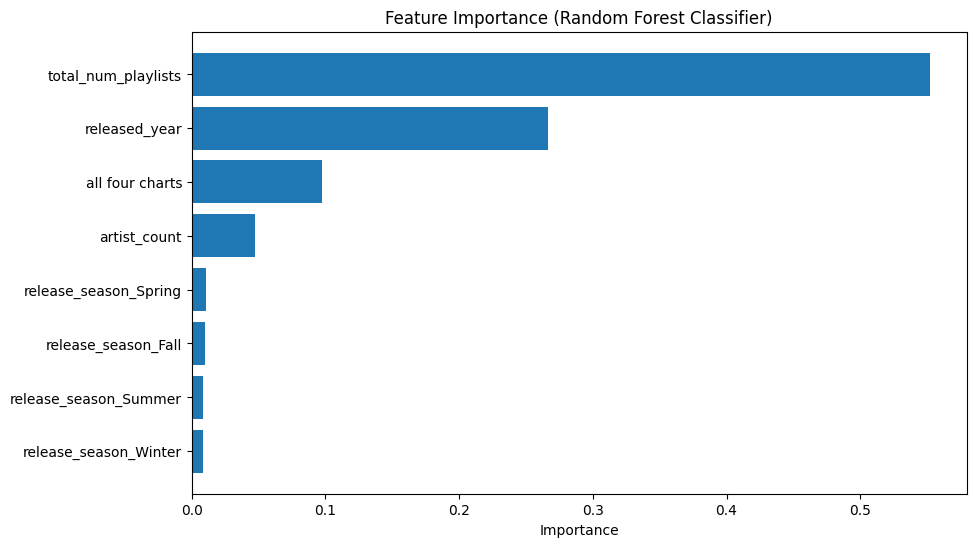

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
df = merged_final.copy()

# Remove outliers in 'streams' (optional for classification)
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])

# Create binary target: is_hit = 1 if streams > 500M, else 0
df['is_hit'] = np.where(df['streams'] >= 500_000_000, 1, 0)

# Apply season mapping
df['release_season'] = df['released_month'].apply(map_month_to_season)

# One-hot encode seasons
df, release_season_ohe = ohe(df, 'release_season')

# One-hot encode 'released_month'
df, released_month_ohe = ohe(df, 'released_month')

# Handle missing values
df = df.dropna()

# Feature selection

selected_features = ['total_num_playlists', 'released_year',
                     'all four charts', 'artist_count'] + release_season_ohe

X = df[selected_features]
y = df['is_hit']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Cross-validation scores
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"\nAverage Accuracy from 5-fold CV: {np.mean(cv_scores):.3f}")

# Feature importance plot
importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest Classifier)")
plt.show()


Accuracy: 0.95703125

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       197
           1       0.86      0.97      0.91        59

    accuracy                           0.96       256
   macro avg       0.93      0.96      0.94       256
weighted avg       0.96      0.96      0.96       256


Confusion Matrix:
 [[188   9]
 [  2  57]]

Average Accuracy from 5-fold CV: 0.875


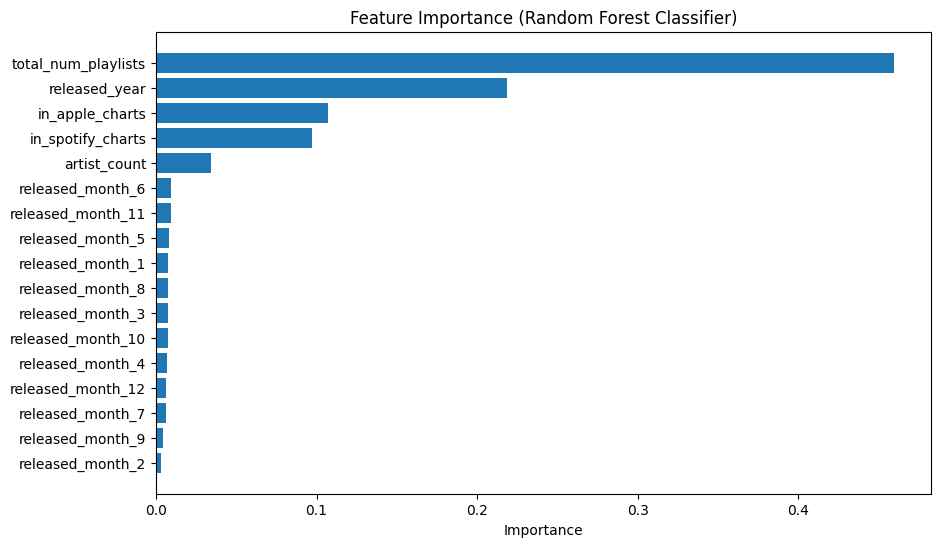

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
df = merged_final.copy()

# Remove outliers in 'streams' (optional for classification)
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])

# Create binary target: is_hit = 1 if streams > 500M, else 0
df['is_hit'] = np.where(df['streams'] >= 500_000_000, 1, 0)

# Apply season mapping
df['release_season'] = df['released_month'].apply(map_month_to_season)

# One-hot encode seasons
df, release_season_ohe = ohe(df, 'release_season')

# One-hot encode 'released_month'
df, released_month_ohe = ohe(df, 'released_month')

# Handle missing values
df = df.dropna()

# Feature selection

selected_features = ['total_num_playlists', 'released_year','in_apple_charts', 'in_spotify_charts', 'artist_count'] + released_month_ohe

X = df[selected_features]
y = df['is_hit']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Cross-validation scores
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"\nAverage Accuracy from 5-fold CV: {np.mean(cv_scores):.3f}")

# Feature importance plot
importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest Classifier)")
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
df = merged_final  # Replace with your actual file path or DataFrame

#Remove outliers
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])


#oneHotEncode
df, released_month_ohe = ohe(df, 'released_month')

# Preview the dataset
df.head()

# Handle missing values (if any)
df = df.dropna()

selected_features = ['total_num_playlists', 'released_year','in_apple_charts', 'in_spotify_charts', 'artist_count'] + released_month_ohe

# Define features (X) and target variable (y)
X = df[selected_features]  # Make sure your target column is named 'streams'
y = df['streams']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

# Cross-validation to evaluate overall model robustness
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
print("Average RMSE from 5-fold CV:", -np.mean(cv_scores))


# Feature Importance (optional)
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print(feature_importance_df)

# Training score
train_r2 = model.score(X_train, y_train)
print(f"Training R^2: {train_r2:.3f}")
print(f"Test R^2: {r2:.3f}")

Root Mean Squared Error (RMSE): 170982086.44857642
R^2 Score: 0.8939461618037673
Average RMSE from 5-fold CV: 225948877.40968633
                Feature  Importance
0   total_num_playlists    0.797717
1         released_year    0.075809
3     in_spotify_charts    0.044218
2       in_apple_charts    0.031884
4          artist_count    0.012945
12     released_month_8    0.004999
10     released_month_6    0.004805
5      released_month_1    0.004510
9      released_month_5    0.004360
7      released_month_3    0.003350
15    released_month_11    0.003051
14    released_month_10    0.002641
13     released_month_9    0.002416
11     released_month_7    0.002386
8      released_month_4    0.002127
16    released_month_12    0.001452
6      released_month_2    0.001330
Training R^2: 0.983
Test R^2: 0.894


Accuracy: 0.9375

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       197
           1       0.81      0.95      0.88        59

    accuracy                           0.94       256
   macro avg       0.90      0.94      0.92       256
weighted avg       0.94      0.94      0.94       256


Confusion Matrix:
 [[184  13]
 [  3  56]]

Average Accuracy from 5-fold CV: 0.864


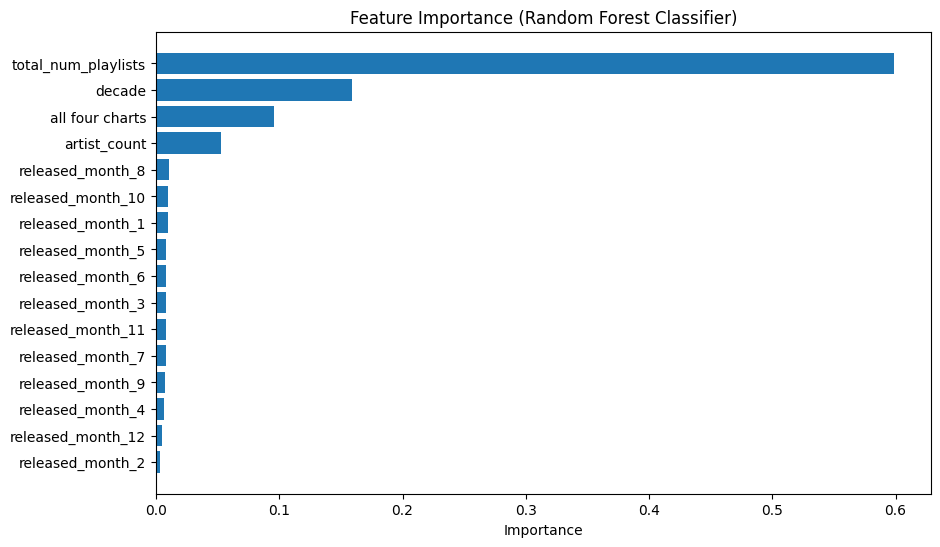

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
df = merged_final.copy()

# Remove outliers in 'streams' (optional for classification)
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])

# Create binary target: is_hit = 1 if streams > 500M, else 0
df['is_hit'] = np.where(df['streams'] >= 500_000_000, 1, 0)

# One-hot encode 'released_month'
df, released_month_ohe = ohe(df, 'released_month')

# Handle missing values
df = df.dropna()

# Feature selection
selected_features = ['total_num_playlists', 'decade', 'all four charts', 'artist_count'] + released_month_ohe
X = df[selected_features]
y = df['is_hit']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Cross-validation scores
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"\nAverage Accuracy from 5-fold CV: {np.mean(cv_scores):.3f}")

# Feature importance plot
importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest Classifier)")
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
df = merged_final  # Replace with your actual file path or DataFrame

#Remove outliers
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])


#oneHotEncode
df, released_month_ohe = ohe(df, 'released_month')

# Preview the dataset
df.head()

# Handle missing values (if any)
df = df.dropna()

selected_features = ['total_num_playlists', 'released_year', 'all four charts'] + released_month_ohe

# Define features (X) and target variable (y)
X = df[selected_features]  # Make sure your target column is named 'streams'
y = df['streams']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

# Cross-validation to evaluate overall model robustness
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
print("Average RMSE from 5-fold CV:", -np.mean(cv_scores))


# Feature Importance (optional)
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print(feature_importance_df)

# Training score
train_r2 = model.score(X_train, y_train)
print(f"Training R^2: {train_r2:.3f}")
print(f"Test R^2: {r2:.3f}")

Root Mean Squared Error (RMSE): 194552557.47536412
R^2 Score: 0.8626909841773694
Average RMSE from 5-fold CV: 244257666.34671456
                Feature  Importance
0   total_num_playlists    0.819886
1         released_year    0.086170
2       all four charts    0.043852
3      released_month_1    0.007060
10     released_month_8    0.006058
8      released_month_6    0.005820
7      released_month_5    0.004396
11     released_month_9    0.003927
13    released_month_11    0.003878
12    released_month_10    0.003643
14    released_month_12    0.003621
5      released_month_3    0.003385
9      released_month_7    0.003232
6      released_month_4    0.003232
4      released_month_2    0.001840
Training R^2: 0.980
Test R^2: 0.863


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd


df = merged_final  # Replace with your actual file path or DataFrame

#Remove outliers
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])

# Apply season mapping
df['release_season'] = df['released_month'].apply(map_month_to_season)

# One-hot encode seasons
df, release_season_ohe = ohe(df, 'release_season')

# Use in your feature set

#oneHotEncode
df, released_month_ohe = ohe(df, 'released_month')

# Preview the dataset
df.head()

# Handle missing values (if any)
df = df.dropna()

selected_features = ['total_num_playlists', 'released_year','all four charts', 'artist_count'] + released_month_ohe

# Define features (X) and target variable (y)
X = df[selected_features]  # Make sure your target column is named 'streams'
y = df['streams']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree = 2 for now, you can experiment with 3+)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

Root Mean Squared Error: 230605545.4994383
R² Score: 0.8070855942072933


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd


df = merged_final  # Replace with your actual file path or DataFrame

#Remove outliers
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])

# Apply season mapping
df['release_season'] = df['released_month'].apply(map_month_to_season)

# One-hot encode seasons
df, release_season_ohe = ohe(df, 'release_season')

# Use in your feature set

#oneHotEncode
df, released_month_ohe = ohe(df, 'released_month')

# Preview the dataset
df.head()

# Handle missing values (if any)
df = df.dropna()

selected_features = ['total_num_playlists', 'released_year','all four charts'] + released_month_ohe

# Define features (X) and target variable (y)
X = df[selected_features]  # Make sure your target column is named 'streams'
y = df['streams']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree = 2 for now, you can experiment with 3+)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

Root Mean Squared Error: 233624699.9976499
R² Score: 0.8020011447356472


In [ ]:
#Questions:
#Should we be concerned with BEYONCE vs BEYONCÉ?

#XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Replace with your actual feature columns
features = ['total_num_playlists']
target = 'streams'

X = spotify_data[features]
y = spotify_data[target]

# Convert non-numeric columns to numeric (if necessary)
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.to_numeric(X[col], errors='coerce')

X.fillna(0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 1.0426006363911738e+17
Root Mean Squared Error: 322893269.73338634


In [ ]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Feature columns
features = ['total_num_playlists']
target = 'streams'

# Prepare data
X = spotify_data[features].copy()
y = spotify_data[target].copy()

# Convert non-numeric features if needed
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.to_numeric(X[col], errors='coerce')
X.fillna(0, inplace=True)

# --- BIN the target into categories (e.g., 3 bins: Low, Medium, High) ---
# You can adjust `q` for more or fewer classes
y_binned = pd.qcut(y, q=3, labels=["Low", "Medium", "High"])

# Encode target classes as integers
le = LabelEncoder()
y_encoded = le.fit_transform(y_binned)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train XGBoost Classifier
clf = xgb.XGBClassifier(objective='multi:softprob', num_class=3, eval_metric='mlogloss', random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.643979057591623

Classification Report:
               precision    recall  f1-score   support

        High       0.77      0.73      0.75        63
         Low       0.69      0.69      0.69        64
      Medium       0.49      0.52      0.50        64

    accuracy                           0.64       191
   macro avg       0.65      0.64      0.65       191
weighted avg       0.65      0.64      0.65       191



the Bins are made to split the streams into 3 different quartiles. With low being the bottom quartile, medium being the middle amount of streams, and high with the top quartile of streams.

In [ ]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# ----------- 1. Feature Setup ------------
features = ['total_num_playlists']
target = 'streams'

# ----------- 2. Remove Outliers ------------
q_low = spotify_data[target].quantile(0.01)
q_high = spotify_data[target].quantile(0.99)
filtered = spotify_data[(spotify_data[target] > q_low) & (spotify_data[target] < q_high)]

X = filtered[features].copy()
y = filtered[target].copy()

# ----------- 3. Handle Non-Numeric Data ------------
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.to_numeric(X[col], errors='coerce')
X.fillna(0, inplace=True)

# ----------- 4. Log-transform the target ------------
y_log = np.log1p(y)

# ----------- 5. Train-Test Split ------------
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# ----------- 6. XGBoost Model Setup ------------
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train_log)

# ----------- 7. Make Predictions ------------
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)            # Reverse log1p to original scale
y_test = np.expm1(y_test_log)            # Reverse test target for fair evaluation

# ----------- 8. Evaluate ------------
r2 = r2_score(y_test, y_pred)
print(f"XGBoost Regression R-squared: {r2}")


XGBoost Regression R-squared: 0.6527123039033892


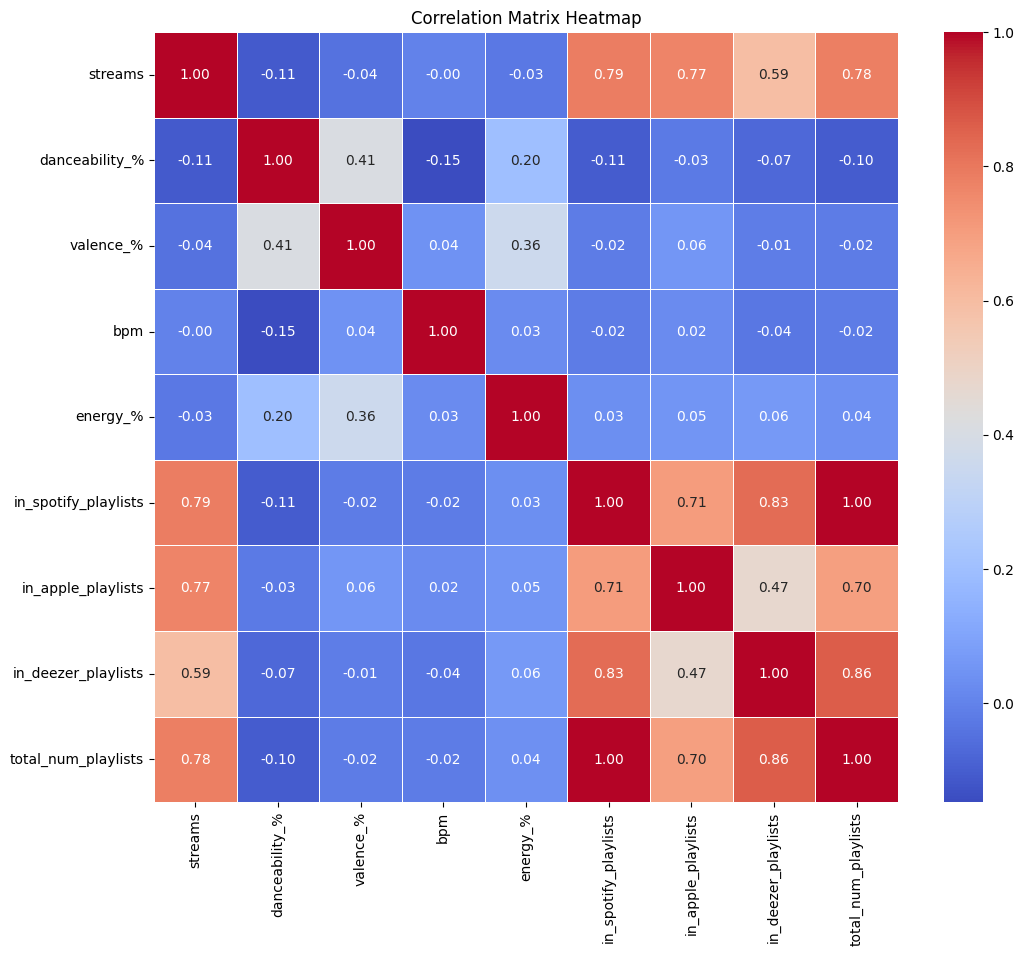

In [ ]:
features_for_correlation = ['streams', 'danceability_%', 'valence_%', 'bpm', 'energy_%', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'total_num_playlists']

# Calculate the correlation matrix
correlation_matrix = spotify_data[features_for_correlation].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


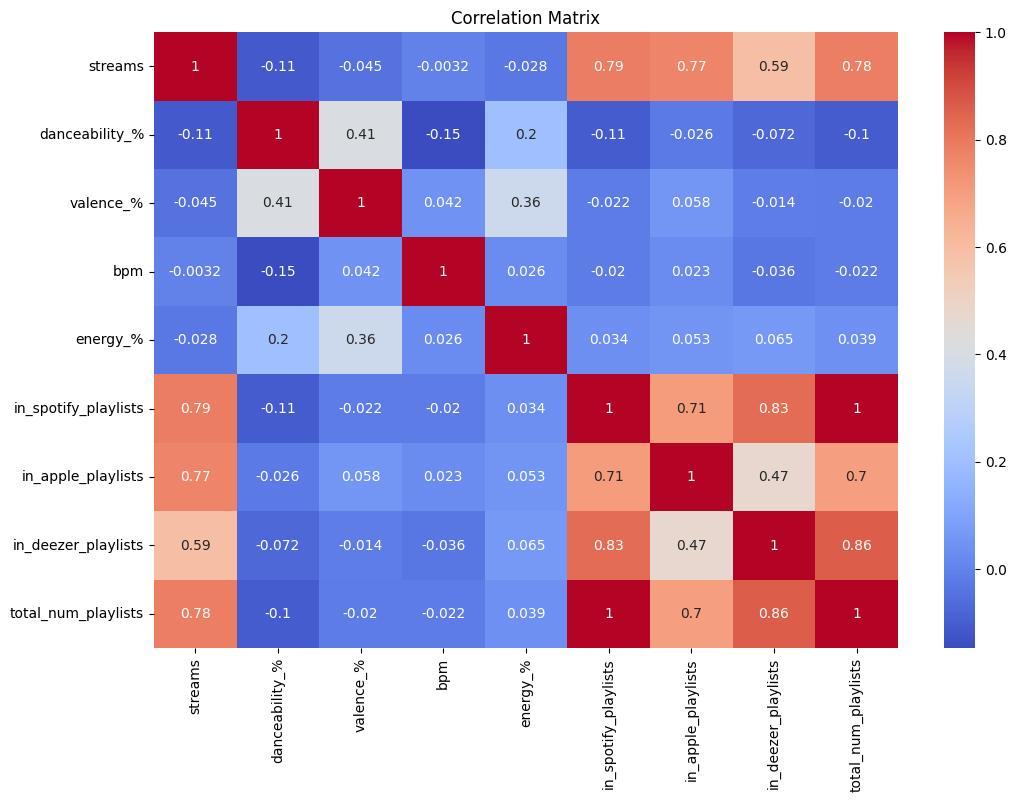

In [ ]:
correlation_with_streams = spotify_data.corr(numeric_only=True)['streams'].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   track_name                 952 non-null    object        
 1   artist(s)_name             952 non-null    object        
 2   artist_count               952 non-null    int64         
 3   released_year              952 non-null    int64         
 4   released_month             952 non-null    int64         
 5   released_day               952 non-null    int64         
 6   in_spotify_playlists       952 non-null    int64         
 7   in_spotify_charts          952 non-null    int64         
 8   streams                    952 non-null    float64       
 9   in_apple_playlists         952 non-null    int64         
 10  in_apple_charts            952 non-null    int64         
 11  in_deezer_playlists        952 non-null    int64         
 12  in_deezer_cha

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')
spotify_data = spotify_data.dropna(subset=['streams']).copy()
spotify_data['has_feature'] = spotify_data['artist_count'] > 1

features = [ 'artist_count', 'released_year','released_month', 'released_day', 'danceability_%','valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%','liveness_%','speechiness_%', 'in_spotify_playlists', 'in_spotify_charts']
spotify_data = spotify_data.dropna(subset=features)
X = spotify_data[features]
y = spotify_data['streams']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

svr = SVR(kernel='rbf', C=10, epsilon=0.1)
svr.fit(X_train_scaled, y_train_log)
y_pred_log = svr.predict(X_test_scaled)
final_r2 = r2_score(y_test_log, y_pred_log)

final_r2



0.6018548559808515

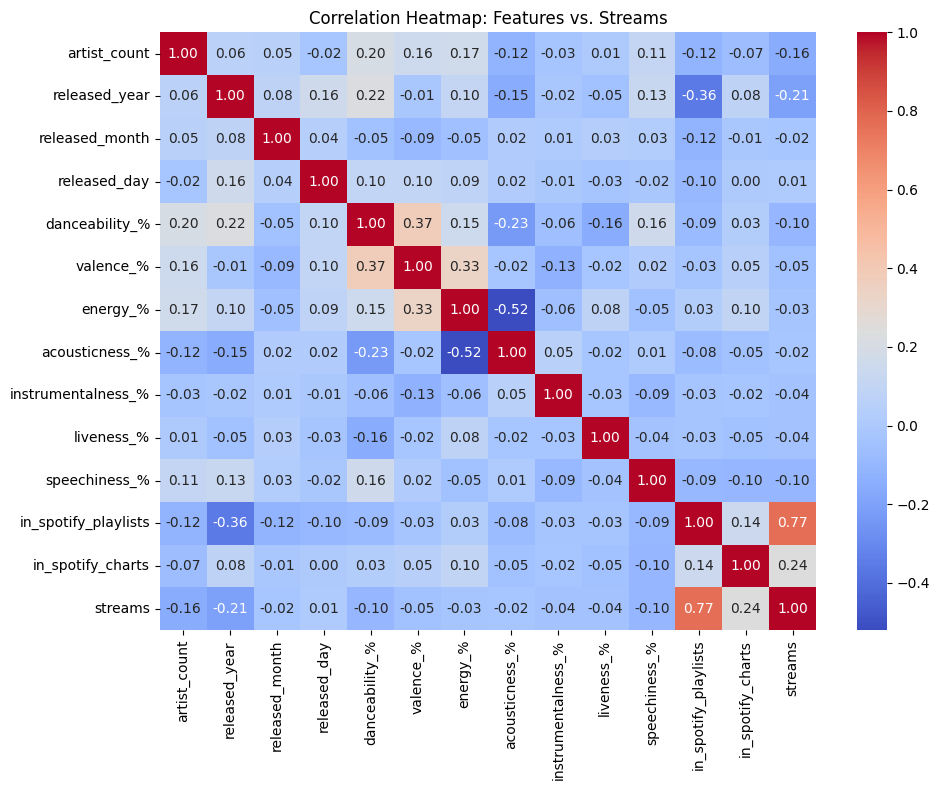

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[features + ['streams']].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap: Features vs. Streams")
plt.tight_layout()
plt.show()

Root Mean Squared Error (RMSE): 198272591.39
R^2 Score: 0.857
Average RMSE from 5-fold CV: 258792080.21420485

Feature Importances:
                Feature  Importance
0   total_num_playlists    0.338555
1         released_year    0.090626
10     released_month_8    0.088955
5      released_month_3    0.066701
3      released_month_1    0.064610
13    released_month_11    0.047714
8      released_month_6    0.042627
9      released_month_7    0.042599
2       all four charts    0.042096
12    released_month_10    0.035409
11     released_month_9    0.032724
7      released_month_5    0.029405
6      released_month_4    0.026862
4      released_month_2    0.026098
14    released_month_12    0.025019

Training R^2: 0.998
Test R^2: 0.857


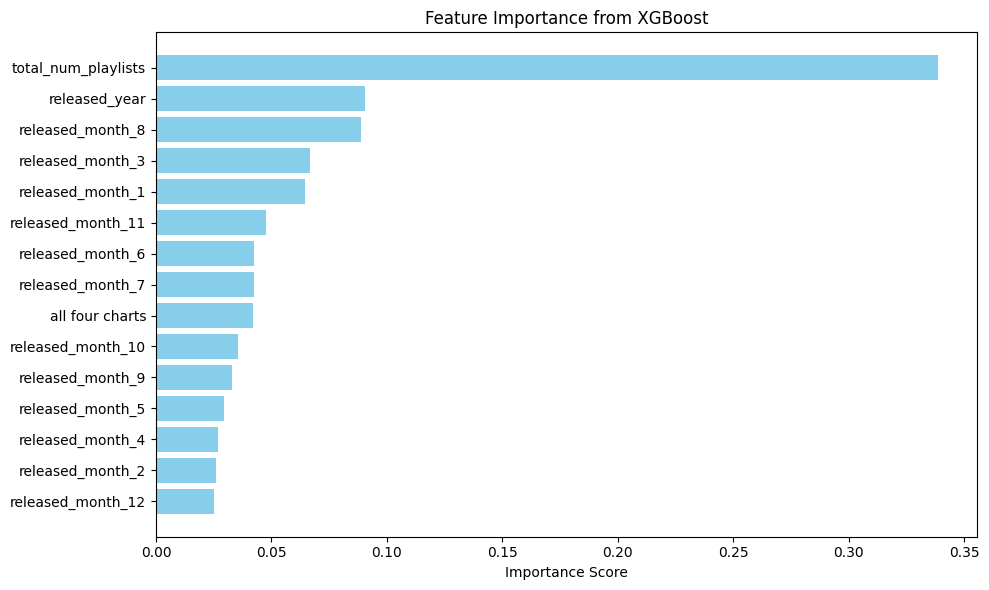

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
df = merged_final.copy()  # Replace with your actual DataFrame

# Remove outliers (cap top 1%)
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])

# One-hot encode the released_month
df, released_month_ohe = ohe(df, 'released_month')

# Drop missing values
df = df.dropna()

# Define selected features
selected_features = ['total_num_playlists', 'released_year', 'all four charts'] + released_month_ohe

# Define features (X) and target variable (y)
X = df[selected_features]
y = df['streams']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.3f}")

# Cross-validation RMSE
cv_scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
print("Average RMSE from 5-fold CV:", -np.mean(cv_scores))

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importance_df)

# Training R²
train_r2 = model.score(X_train, y_train)
print(f"\nTraining R^2: {train_r2:.3f}")
print(f"Test R^2: {r2:.3f}")

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from XGBoost')
plt.gca().invert_yaxis()  # Most important feature at top
plt.tight_layout()
plt.show()


Model 1 XGBoost

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       197
           1       0.89      0.93      0.91        59

    accuracy                           0.96       256
   macro avg       0.93      0.95      0.94       256
weighted avg       0.96      0.96      0.96       256

Confusion Matrix:
[[190   7]
 [  4  55]]

Average Accuracy from 5-fold CV: 0.881


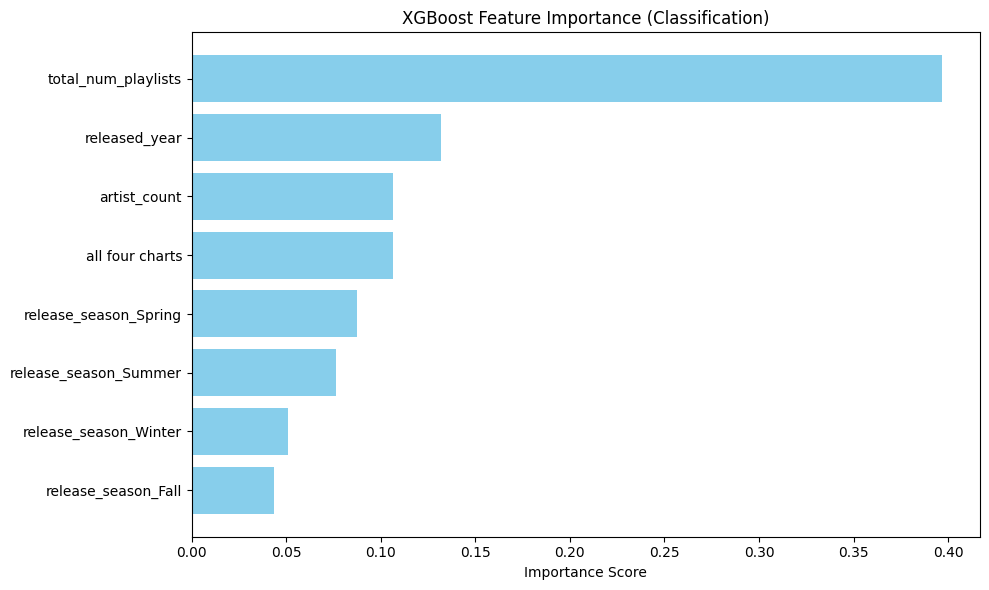

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ✅ Helper function: map month → season
def map_month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Unknown'

# ✅ Your Data
df = merged_final.copy()

# ✅ Cap outliers in streams
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])

# ✅ Binary classification target
df['is_hit'] = (df['streams'] >= 500_000_000).astype(int)

# ✅ Map month to season
df['release_season'] = df['released_month'].apply(map_month_to_season)

# ✅ One-hot encode season
df, release_season_ohe = ohe(df, 'release_season')

# ✅ Drop missing rows
df = df.dropna()

# ✅ Feature selection
selected_features = ['total_num_playlists', 'released_year','all four charts', 'artist_count'] + release_season_ohe
X = df[selected_features]
y = df['is_hit']

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ XGBoost Classifier
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# ✅ Predictions
y_pred = model.predict(X_test)

# ✅ Classification Metrics
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ✅ Cross-validation Accuracy
cv_accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"\nAverage Accuracy from 5-fold CV: {cv_accuracy.mean():.3f}")

# ✅ Feature Importance Plot
importances = model.feature_importances_
feature_names = X.columns

# Create and sort dataframe
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('XGBoost Feature Importance (Classification)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


📈 XGBoost Regression Results:
RMSE: 204553666.99
R² Score: 0.8482
Training R²: 0.9970
Test R²: 0.8482

Average RMSE from 5-fold CV: 251595691.94


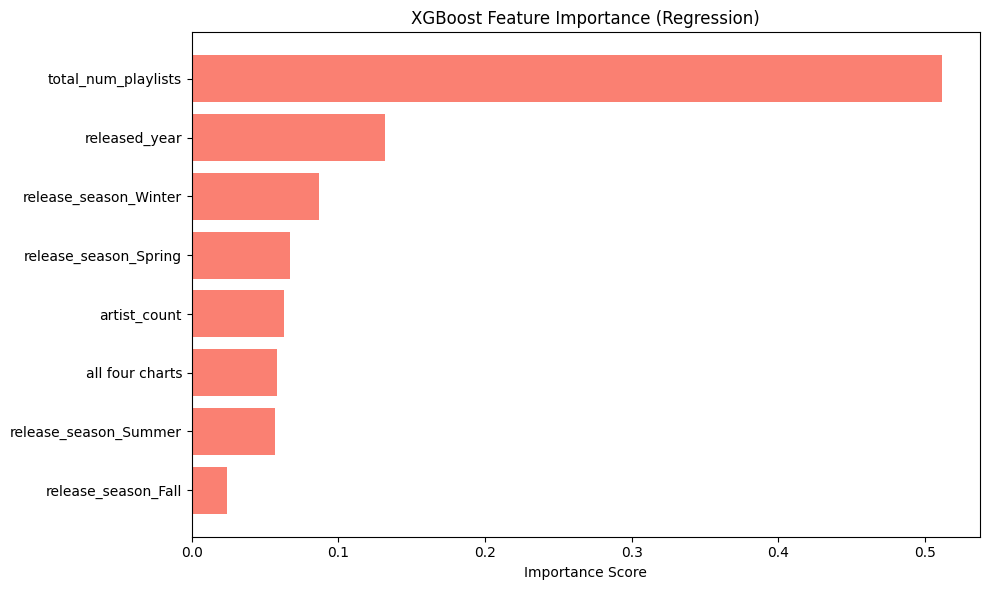

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# ✅ Helper: map month → season
def map_month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Unknown'

# ✅ Load and preprocess data
df = merged_final.copy()

# ✅ Cap outliers
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])

# ✅ Map month to season
df['release_season'] = df['released_month'].apply(map_month_to_season)

# ✅ One-hot encode season
df, release_season_ohe = ohe(df, 'release_season')

# ✅ Drop missing values
df = df.dropna()

# ✅ Feature selection
selected_features = ['total_num_playlists', 'released_year','all four charts', 'artist_count'] + release_season_ohe
X = df[selected_features]
y = df['streams']

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Initialize and train regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ✅ Predictions
y_pred = model.predict(X_test)

# ✅ Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

print("📈 XGBoost Regression Results:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

# ✅ Cross-validation RMSE
cv_rmse = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
print(f"\nAverage RMSE from 5-fold CV: {-cv_rmse.mean():.2f}")

# ✅ Feature Importance Plot
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='salmon')
plt.xlabel('Importance Score')
plt.title('XGBoost Feature Importance (Regression)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Model 2 XGBoost

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       197
           1       0.86      0.93      0.89        59

    accuracy                           0.95       256
   macro avg       0.92      0.94      0.93       256
weighted avg       0.95      0.95      0.95       256

Confusion Matrix:
[[188   9]
 [  4  55]]

Average Accuracy from 5-fold CV: 0.886


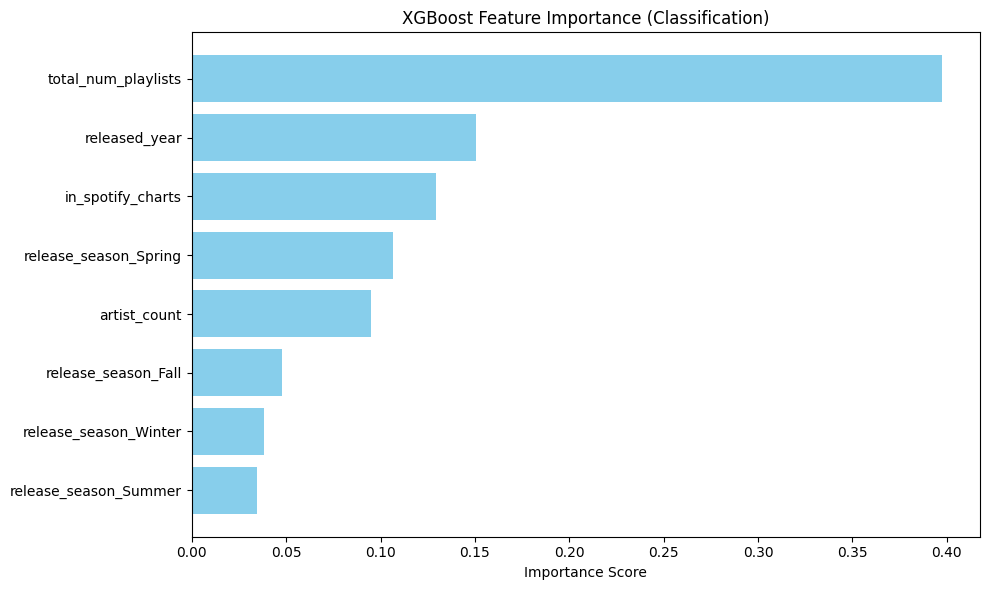

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ✅ Helper function: map month → season
def map_month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Unknown'

# ✅ Your Data
df = merged_final.copy()

# ✅ Cap outliers in streams
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])

# ✅ Binary classification target
df['is_hit'] = (df['streams'] >= 500_000_000).astype(int)

# ✅ Map month to season
df['release_season'] = df['released_month'].apply(map_month_to_season)

# ✅ One-hot encode season
df, release_season_ohe = ohe(df, 'release_season')

# ✅ Drop missing rows
df = df.dropna()

# ✅ Feature selection
selected_features = ['total_num_playlists', 'released_year','in_spotify_charts', 'artist_count'] + release_season_ohe
X = df[selected_features]
y = df['is_hit']

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ XGBoost Classifier
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# ✅ Predictions
y_pred = model.predict(X_test)

# ✅ Classification Metrics
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ✅ Cross-validation Accuracy
cv_accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"\nAverage Accuracy from 5-fold CV: {cv_accuracy.mean():.3f}")

# ✅ Feature Importance Plot
importances = model.feature_importances_
feature_names = X.columns

# Create and sort dataframe
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('XGBoost Feature Importance (Classification)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


📈 XGBoost Regression Results:
RMSE: 187801206.92
R² Score: 0.8721
Training R²: 0.9982
Test R²: 0.8721

Average RMSE from 5-fold CV: 243070754.39


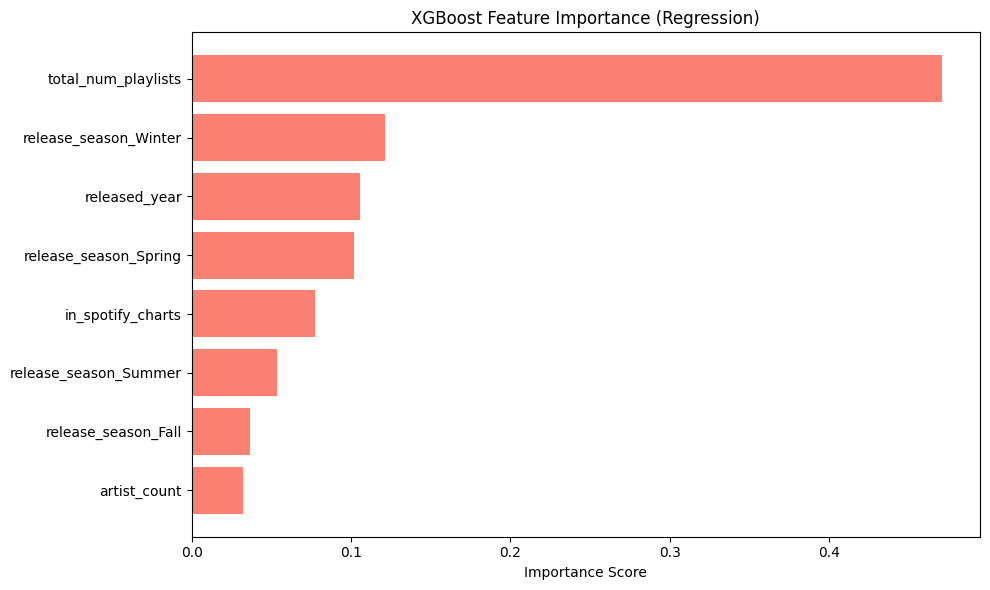

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# ✅ Helper: map month → season
def map_month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Unknown'

# ✅ Load and preprocess data
df = merged_final.copy()

# ✅ Cap outliers
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])

# ✅ Map month to season
df['release_season'] = df['released_month'].apply(map_month_to_season)

# ✅ One-hot encode season
df, release_season_ohe = ohe(df, 'release_season')

# ✅ Drop missing values
df = df.dropna()

# ✅ Feature selection
selected_features = ['total_num_playlists', 'released_year','in_spotify_charts', 'artist_count'] + release_season_ohe
X = df[selected_features]
y = df['streams']

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Initialize and train regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ✅ Predictions
y_pred = model.predict(X_test)

# ✅ Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

print("📈 XGBoost Regression Results:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

# ✅ Cross-validation RMSE
cv_rmse = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
print(f"\nAverage RMSE from 5-fold CV: {-cv_rmse.mean():.2f}")

# ✅ Feature Importance Plot
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='salmon')
plt.xlabel('Importance Score')
plt.title('XGBoost Feature Importance (Regression)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Neural Networks


In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Load & copy your main data
df = merged_final.copy()

# ✅ Cap outliers
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])

# ✅ Create binary target
df['is_hit'] = (df['streams'] >= 500_000_000).astype(int)

# ✅ Map months to seasons
def map_month_to_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    elif month in [9, 10, 11]: return 'Fall'
    return 'Unknown'

df['release_season'] = df['released_month'].apply(map_month_to_season)
df = pd.get_dummies(df, columns=['release_season'], prefix='season')

# ✅ Drop missing
df = df.dropna()

# ✅ Features for neural net
features = ['total_num_playlists', 'released_year', 'in_spotify_charts', 'artist_count'] + \
           [col for col in df.columns if col.startswith('season_')]
X = df[features]
y = df['is_hit']

# ✅ Split & scale
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Neural Net Model (deeper structure)
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ✅ Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=0
)

# ✅ Evaluate
y_pred_prob = model.predict(X_test_scaled).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# ✅ R² scores
train_r2 = r2_score(y_train, model.predict(X_train_scaled).flatten())
test_r2 = r2_score(y_test, y_pred_prob)
print(f"\n📊 Training R²: {train_r2:.4f}")
print(f"📊 Test R²:     {test_r2:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
✅ Accuracy: 0.89453125

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       187
           1       0.81      0.80      0.80        69

    accuracy                           0.89       256
   macro avg       0.87      0.86      0.87       256
weighted avg       0.89      0.89      0.89       256

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

📊 Training R²: 0.7613
📊 Test R²:     0.6436


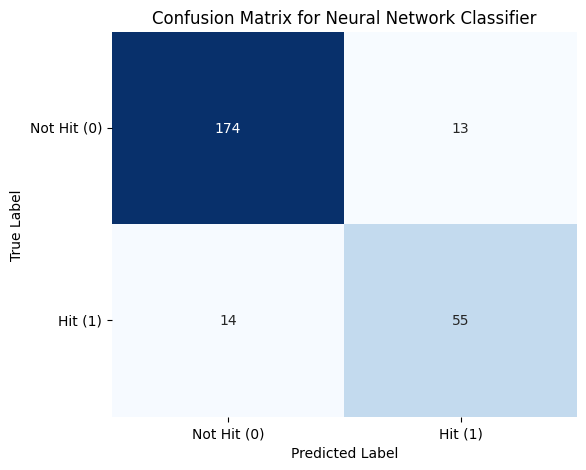

In [ ]:
# 📦 Import
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ✅ Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# ✅ Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Neural Network Classifier')
plt.xticks([0.5, 1.5], ['Not Hit (0)', 'Hit (1)'])
plt.yticks([0.5, 1.5], ['Not Hit (0)', 'Hit (1)'], rotation=0)
plt.show()


In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# ✅ Load and copy your main data
df = merged_final.copy()

# ✅ Cap outliers
cap = df['streams'].quantile(0.99)
df['streams'] = np.where(df['streams'] > cap, cap, df['streams'])

# ✅ Map release month to season
def map_month_to_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    elif month in [9, 10, 11]: return 'Fall'
    return 'Unknown'

df['release_season'] = df['released_month'].apply(map_month_to_season)
df = pd.get_dummies(df, columns=['release_season'], prefix='season')

# ✅ Drop missing rows
df = df.dropna()

# ✅ Select features
features = ['total_num_playlists', 'released_year', 'in_spotify_charts', 'artist_count'] + \
           [col for col in df.columns if col.startswith('season_')]
X = df[features]
y = df['streams']

# ✅ Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Scale input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Build deep neural network for regression
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1)  # No activation for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')

# ✅ Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ✅ Train model
model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=0
)

# ✅ Predict
y_pred = model.predict(X_test_scaled).flatten()

# ✅ Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, model.predict(X_train_scaled).flatten())

print(f"✅ RMSE: {rmse:.2f}")
print(f"📊 Test R²: {r2_test:.4f}")
print(f"📊 Train R²: {r2_train:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
✅ RMSE: 674525366.77
📊 Test R²: -0.6505
📊 Train R²: -0.7981


In [ ]:
# prompt: create a peice of code that will give me the top most stremed song in 2023

# Assuming 'streams' column is numeric and cleaned
top_song_2023 = spotify_data[spotify_data['released_year'] == 2023].sort_values('streams', ascending=False).iloc[0]

print("Top streamed song in 2023:")
print(top_song_2023[['track_name', 'artist(s)_name', 'streams']])


Top streamed song in 2023:
track_name              flowers
artist(s)_name    [Miley Cyrus]
streams            1316855716.0
Name: 12, dtype: object
